In [4]:
import sys
import os
import pandas as pd

from bokeh.palettes import Category10


import matplotlib.pyplot as plt



#Adjust the working folder
file_folder = globals()['_dh'][0]
wk_dir = os.path.dirname(file_folder)
os.chdir(wk_dir)
# from core.feature import *
# #from core.submit import *
# from core.check import *
# from core.predict import *
# from core.merge import *
# from core.merge import *

from file_cache.utils.util_pandas import *
from file_cache.cache import file_cache
from file_cache.utils.util_log import *

logging.getLogger().setLevel(logging.INFO)

import argparse
sys.argv = ['program',  '-W' , '--gp_name', 'lr_bin_9', '--shift', 0]

 
    


logging.getLogger().setLevel(logging.INFO)

In [6]:
def get_refer_day(d):
    sn = [item for item in range(40) if item%7 not in [5,6] ]
    sn_map = dict(zip(sn[:-1], sn[1:]))
    return sn_map[d]

get_refer_day(1)

2

In [57]:
bk= get_blocks()
bk.loc[bk.col=='var009']

NameError: name 'get_blocks' is not defined

In [5]:
get_best_para ('lr_bin', 'var004', 10,0)

2019-02-17 21:09:30,517 util_log.py[53] ERROR 'momenta_impact_ratio'
Traceback (most recent call last):
  File "/Users/lali2/dev/python/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/base.py", line 2525, in get_loc
    return self._engine.get_loc(key)
  File "pandas/_libs/index.pyx", line 117, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 139, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 1265, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 1273, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'momenta_impact_ratio'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/lali2/dev/python/anaconda3/lib/python3.6/site-packages/file_cache/utils/util_log.py", line 51, in inner
    result = fn(*args, **kwargs)
  File "/Users/lali2/Documents/workspace_py/df_jf

KeyError: 'momenta_impact_ratio'

In [2]:
logging.getLogger().setLevel(logging.INFO)
gen_blk_result(2218, False)

/Users/lali2/dev/python/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/lali2/dev/python/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)
/Users/lali2/dev/python/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inp

7

In [9]:
 
    
file_num = 4
blk_id = 137 #176
train_df ,val_df, data_blk_id = get_train_val(blk_id, file_num, 2.1, 0, 0.91, True, 0,  'up')
print(int(train_df.time_sn.head(1)), train_df.index[0],train_df.index[-1], train_df.shape, val_df.shape, data_blk_id, train_df.columns)

train_df ,val_df, data_blk_id = get_train_val(blk_id, file_num, 2.1, 0, 0.91, True, 0,  'down')
print(int(train_df.time_sn.head(1)), train_df.index[0],train_df.index[-1],  train_df.shape, val_df.shape, data_blk_id, train_df.columns)

train_df ,val_df, data_blk_id = get_train_val(blk_id, file_num, 2.1, 0, 0.91, True, 0,  'left')
print(int(train_df.time_sn.head(1)) ,train_df.index[0],train_df.index[-1], train_df.shape, val_df.shape, data_blk_id, train_df.columns)

2237184 299884 300475 (478, 5) (114, 5) 136 Index(['var003', 'var003_12', 'var003_2', 'var003_5', 'time_sn'], dtype='object')
2242404 300592 301183 (478, 5) (114, 5) 138 Index(['var003', 'var003_12', 'var003_2', 'var003_5', 'time_sn'], dtype='object')
2239878 303808 304377 (456, 5) (114, 5) 36616 Index(['var003', 'var003_18', 'var003_16', 'var003_19', 'time_sn'], dtype='object')


In [103]:


 


#col_name =  'var031' #'var018'
#col =  'var018' #'var018'
#col =  'var067'
#col_name = 'var018' #'var006'
#low
col_name = 'var046' #'var004'

blks = get_blocks()
miss_blk = blks.loc[(blks.col==col_name) & (blks.kind=='missing')& (blks.wtid==1)].sort_values('length', ascending=False).iloc[0]
print(miss_blk.name, miss_blk.length)
tmp_blk = blks.loc[(blks.col==col_name) & (blks.kind=='train')& (blks.wtid==1)].sort_values('length', ascending=False).iloc[0]
#print(tmp_blk)

begin = round((tmp_blk.begin + tmp_blk.end)/2)
end = begin+miss_blk.length

args_list = get_args_dynamic(col_name)
print(len(args_list))
args_list.loc[args_list.col_name == col_name]
print(args_list.columns)
tmp, score_tmp = None, None
res_list = []
for sn, arg in args_list.iterrows():

    est_blk_id = miss_blk.name
    tmp, score_tmp = predict_section(est_blk_id, miss_blk.wtid, col_name, begin, end, arg)
    res_list.append((score_tmp,DefaultMunch(None,arg) ))

res_list = sorted(res_list, key=lambda val: val[0])
for item in res_list:
    print(item)
    
#tmp,  score

2218 1402
begin          105777
col            var046
distinct          NaN
end            107178
kind          missing
max               NaN
min               NaN
wtid                1
length           1402
data_type     float64
time_begin     111453
time_end       112929
Name: 2218, dtype: object
7
Index(['class_name', 'col_name', 'drop_threshold', 'file_num', 'momenta_col_length', 'momenta_impact_ratio', 'related_col_count', 'time_sn', 'window'], dtype='object')


/Users/lali2/dev/python/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/lali2/Documents/workspace_py/df_jf/core/feature.py:364: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  val.drop(axis='column', columns=drop_list, inplace=True)


===== <class 'float'> <class 'int'>


/Users/lali2/dev/python/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/lali2/Documents/workspace_py/df_jf/core/feature.py:364: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  val.drop(axis='column', columns=drop_list, inplace=True)


===== <class 'float'> <class 'int'>


/Users/lali2/dev/python/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/lali2/Documents/workspace_py/df_jf/core/feature.py:364: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  val.drop(axis='column', columns=drop_list, inplace=True)


===== <class 'float'> <class 'int'>


/Users/lali2/dev/python/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/lali2/Documents/workspace_py/df_jf/core/feature.py:364: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  val.drop(axis='column', columns=drop_list, inplace=True)


===== <class 'float'> <class 'int'>


/Users/lali2/dev/python/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/lali2/Documents/workspace_py/df_jf/core/feature.py:364: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  val.drop(axis='column', columns=drop_list, inplace=True)


===== <class 'float'> <class 'int'>


/Users/lali2/dev/python/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/lali2/Documents/workspace_py/df_jf/core/feature.py:364: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  val.drop(axis='column', columns=drop_list, inplace=True)


===== <class 'float'> <class 'int'>


/Users/lali2/dev/python/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


===== <class 'float'> <class 'int'>
(0.58617391, DefaultMunch(None, {'class_name': 'lr', 'col_name': 'var046', 'drop_threshold': 0.95, 'file_num': 12.0, 'momenta_col_length': 2.0, 'momenta_impact_ratio': 0.1, 'related_col_count': 2.0, 'time_sn': 1.0, 'window': 0.49999999999999994}))
(0.58696265, DefaultMunch(None, {'class_name': 'lr', 'col_name': 'var046', 'drop_threshold': 0.95, 'file_num': 12.0, 'momenta_col_length': 2.0, 'momenta_impact_ratio': 0.1, 'related_col_count': 2.0, 'time_sn': 1.0, 'window': 0.8999999999999999}))
(0.58993086, DefaultMunch(None, {'class_name': 'lr', 'col_name': 'var046', 'drop_threshold': 0.95, 'file_num': 12.0, 'momenta_col_length': 2.0, 'momenta_impact_ratio': 0.1, 'related_col_count': 2.0, 'time_sn': 1.0, 'window': 0.6}))
(0.59054305, DefaultMunch(None, {'class_name': 'lr', 'col_name': 'var046', 'drop_threshold': 0.95, 'file_num': 12.0, 'momenta_col_length': 2.0, 'momenta_impact_ratio': 0.1, 'related_col_count': 2.0, 'time_sn': 1.0, 'window': 0.7999999999

/Users/lali2/Documents/workspace_py/df_jf/core/feature.py:364: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  val.drop(axis='column', columns=drop_list, inplace=True)


In [92]:
blks = get_blocks()
#print(blks.shape, col_name, blks.col.drop_duplicates())
col_name = 'var046'
print(col_name)
print(blks.col.drop_duplicates() )
blks.loc[blks.col==col_name] 
blks.head()


var042
0       var001
49      var002
98      var003
147     var004
196     var005
245     var006
294     var007
343     var008
392     var009
441     var010
490     var011
539     var012
588     var013
637     var014
686     var015
735     var016
784     var017
833     var018
882     var019
931     var020
980     var021
1029    var022
1078    var023
1127    var024
1176    var025
1225    var026
1274    var027
1323    var028
1372    var029
1421    var030
1470    var031
1519    var032
1568    var033
1617    var034
1666    var035
1715    var036
1764    var037
1813    var038
1862    var039
1911    var040
1960    var041
2009    var042
2058    var043
2107    var044
2156    var045
2205    var046
2254    var047
2303    var048
2352    var049
2401    var050
2450    var051
2499    var052
2548    var053
2597    var054
2646    var055
2695    var056
2744    var057
2793    var058
2842    var059
2891    var060
2940    var061
2989    var062
3038    var063
3087    var064
3136    var065
3185    var066
323

begin     col  distinct    end     kind     max     min wtid length data_type  time_begin  time_end
0      0  var001      99.0   9546    train  415.89  398.99    1   9547   float64           0     10057
1   9547  var001       NaN   9764  missing     NaN     NaN    1    218   float64       10058     10286
2   9765  var001      95.0  27673    train  415.89  399.68    1  17909   float64       10287     29155
3  27674  var001       NaN  27958  missing     NaN     NaN    1    285   float64       29156     29455
4  27959  var001      45.0  35878    train  409.17  400.54    1   7920   float64       29456     37798

In [23]:
blks.loc[(blks.col==col_name) & (blks.kind=='missing')& (blks.wtid==1)].sort_values('length', ascending=False)

begin     col  distinct     end     kind  max  min wtid length data_type  time_begin  time_end
258  105777  var006       NaN  107178  missing  NaN  NaN    1   1402   float64      111453    112929
256   73292  var006       NaN   74690  missing  NaN  NaN    1   1399   float64       77217     78692
286  302843  var006       NaN  303908  missing  NaN  NaN    1   1066   float64      322714    323836
268  177479  var006       NaN  178124  missing  NaN  NaN    1    646   float64      190463    191142
280  265690  var006       NaN  266110  missing  NaN  NaN    1    421   float64      283571    284014
276  229044  var006       NaN  229455  missing  NaN  NaN    1    412   float64      244970    245403
274  211937  var006       NaN  212333  missing  NaN  NaN    1    397   float64      226773    227191
252   47257  var006       NaN   47635  missing  NaN  NaN    1    379   float64       49785     50183
288  334602  var006       NaN  334950  missing  NaN  NaN    1    349   float64      356019    356387
270  194890  var006       NaN  195204  missing  NaN  NaN    1    315   float64      208802    209146
266  150083  var006       NaN  150395  missing  NaN  NaN    1    313   float64      158125    158454
254   70657  var006       NaN   70953  missing  NaN  NaN    1    297   float64       74441     74752
250   27674  var006       NaN   27958  missing  NaN  NaN    1    285   float64       29156     29455
272  210531  var006       NaN  210808  missing  NaN  NaN    1    278   float64      225292    225584
264  146532  var006       NaN  146795  missing  NaN  NaN    1    264   float64      154383    154660
246    9547  var006       NaN    9764  missing  NaN  NaN    1    218   float64       10058     10286
282  285820  var006       NaN  286000  missing  NaN  NaN    1    181   float64      304780    304969
278  257528  var006       NaN  257649  missing  NaN  NaN    1    122   float64      274974    275102
284  300477  var006       NaN  300590  missing  NaN  NaN    1    114   float64      320222    320341
262  134844  var006       NaN  134949  missing  NaN  NaN    1    106   float64      142070    142181
260  119349  var006       NaN  119384  missing  NaN  NaN    1     36   float64      125749    125786
292  356975  var006       NaN  356994  missing  NaN  NaN    1     20   float64      379603    379623
248   16360  var006       NaN   16368  missing  NaN  NaN    1      9   float64       17237     17245
290  354983  var006       NaN  354983  missing  NaN  NaN    1      1   float64      377505    377505

In [10]:

from multiprocessing import Pool as ThreadPool  # 进程

logger.info(f"Start a poll with size:{check_options().thread}")
pool = ThreadPool(check_options().thread)

#summary = summary_all_best_score()

bin_count = check_options().bin_count
import itertools
bin_col_list = itertools.product(get_predict_col(), range(0, bin_count))
#bin_col_list = [(5,'var029')]


pool.map(print, bin_col_list, chunksize=1)


# import itertools
# for xx in bin_col_list:
#     print (xx)


2019-02-15 20:48:28,592 <ipython-input-10-1170ab26d203>[4] INFO Start a poll with size:10


('var001', 2)
('var001', 5)
('var001', 1)
('var001', 6)
('var001', 0)
('var001', 3)
('var001', 7)
('var001', 8)
('var001', 9)
('var001', 4)
('var002', 0)
('var002', 1)
('var002', 2)
('var002', 3)
('var002', 4)
('var002', 5)
('var002', 6)
('var002', 8)
('var003', 0)
('var002', 7)
('var003', 1)
('var002', 9)
('var003', 2)
('var003', 3)
('var003', 4)
('var003', 5)
('var003', 6)
('var003', 7)
('var003', 8)
('var003', 9)
('var004', 1)
('var004', 0)
('var004', 2)
('var004', 3)
('var004', 4)
('var004', 5)
('var004', 6)
('var004', 7)
('var004', 8)
('var004', 9)
('var005', 1)
('var005', 0)
('var005', 2)
('var005', 3)
('var005', 4)
('var005', 5)
('var005', 6)
('var005', 7)
('var005', 8)
('var005', 9)
('var006', 1)
('var006', 0)
('var006', 3)
('var006', 2)
('var006', 4)
('var006', 5)
('var006', 6)
('var006', 7)
('var006', 8)
('var006', 9)
('var007', 0)
('var007', 1)
('var007', 2)
('var007', 3)
('var007', 4)
('var007', 5)
('var007', 6)
('var007', 7)
('var007', 8)
('var007', 9)
('var008', 0)
('var0

('var059', 6)
('var059', 7)
('var059', 8)
('var059', 9)
('var060', 0)
('var060', 1)
('var060', 2)
('var060', 3)
('var060', 4)
('var060', 5)
('var060', 6)
('var060', 7)
('var060', 8)
('var060', 9)
('var061', 0)
('var061', 1)
('var061', 2)
('var061', 3)
('var061', 4)
('var061', 5)
('var061', 6)
('var061', 7)
('var061', 8)
('var061', 9)
('var062', 0)
('var062', 1)
('var062', 2)
('var062', 3)
('var062', 4)
('var062', 5)
('var062', 6)
('var062', 7)
('var062', 8)
('var062', 9)
('var063', 2)
('var063', 1)
('var063', 3)
('var063', 0)
('var063', 4)
('var063', 5)
('var063', 6)
('var063', 7)
('var063', 8)
('var063', 9)
('var064', 0)
('var064', 2)
('var064', 1)
('var064', 3)
('var064', 4)
('var064', 5)
('var064', 6)
('var064', 7)
('var064', 8)
('var064', 9)
('var065', 0)
('var065', 1)
('var065', 2)
('var065', 3)
('var065', 4)
('var065', 5)
('var065', 6)
('var065', 7)
('var065', 9)
('var065', 8)
('var066', 0)
('var066', 1)
('var066', 5)
('var066', 2)
('var066', 3)
('var066', 8)
('var066', 4)
('var0

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

('var068', 4)
('var068', 5)
('var068', 7)
('var068', 6)
('var068', 9)
('var068', 8)


Process ForkPoolWorker-44:
Process ForkPoolWorker-41:
Process ForkPoolWorker-48:
Process ForkPoolWorker-45:
Process ForkPoolWorker-50:
Process ForkPoolWorker-43:
Process ForkPoolWorker-46:
Process ForkPoolWorker-47:
Process ForkPoolWorker-42:
Process ForkPoolWorker-49:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/apps/dslab/anaconda/python3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/apps/dslab/anaconda/python3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/apps/dslab/anaconda/python3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/apps/dslab/ana

In [4]:
train_df ,val_df, blk_id = get_train_val(24275, 3, 0.7, 0, 0.9, 0, True )
train_df.shape, val_df.shape , blk_id                                     

/apps/dslab/anaconda/python3/lib/python3.6/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


((12, 2), (9, 2), 24276)

In [27]:
bk = get_blocks()
bk.head()

begin     col  distinct    end     kind     max     min wtid length data_type
0      0  var001      99.0   9546    train  415.89  398.99    1   9547   float64
1   9547  var001       NaN   9764  missing     NaN     NaN    1    218   float64
2   9765  var001      95.0  27673    train  415.89  399.68    1  17909   float64
3  27674  var001       NaN  27958  missing     NaN     NaN    1    285   float64
4  27959  var001      45.0  35878    train  409.17  400.54    1   7920   float64

In [12]:
bk.columns.remove('col')

AttributeError: 'Index' object has no attribute 'remove'

In [ ]:
def get_args_mini(col_name, para_name, top_n=3):
    # tmp = merge_score_col(col_name, [1,2,3]) #get_mini_args
    #
    # tmp = tmp.groupby(para_name).agg({'score':['max', 'mean']})
    # tmp.columns = ['_'.join(items) for items in tmp.columns]
    # tmp = tmp.sort_values('score_mean', ascending=False)
    #
    # args = set(tmp.index.values[:top_n])

    tmp = estimate_score(0, 'base_9')
    # tmp = tmp.loc[tmp.col_name == col_name].sort_values('score_count', ascending=False).reset_index(drop=True)

    tmp = tmp.loc[tmp.col_name == col_name].sort_values('score_count', ascending=False).reset_index(drop=True)
    return  tmp[para_name].drop_duplicates()[:1].values
get_args_mini('var001', 'file_num')

In [23]:
tmp = get_train_val(100296, 1, 0.5, 1.0, 0.9, 0, True)


2019-02-14 23:00:04,790 util_log.py[53] ERROR slice indices must be integers or None or have an __index__ method
Traceback (most recent call last):
  File "/users/hdpsbp/felix/file_cache/file_cache/utils/util_log.py", line 51, in inner
    result = fn(*args, **kwargs)
  File "/mapr/hadoopProd1/app/hdpbartwa/bk/df_jf/core/feature.py", line 524, in get_train_feature_multi_file
    train = rename_col_for_merge_across_wtid(wtid, col, related_col_count) #get_train_feature_multi_file
  File "/mapr/hadoopProd1/app/hdpbartwa/bk/df_jf/core/feature.py", line 469, in rename_col_for_merge_across_wtid
    closed_col = closed_col[1:related_col_count+1]
  File "/apps/dslab/anaconda/python3/lib/python3.6/site-packages/pandas/core/indexes/base.py", line 1748, in __getitem__
    return promote(getitem(key))
TypeError: slice indices must be integers or None or have an __index__ method
2019-02-14 23:00:04,808 util_log.py[54] ERROR Exception from: get_train_feature_multi_file([31, 'var020', 1, 1.0], []), e

TypeError: slice indices must be integers or None or have an __index__ method

In [ ]:
tmp.at[]

2019-02-16 00:01:43,814 util_log.py[47] INFO get_data_block_all begin with(0 paras) :[], []
2019-02-16 00:01:43,967 util_log.py[65] INFO get_data_block_all cost 0.2 sec:(0 paras)([], []), return:DF:(55802, 7), end 
2019-02-16 00:01:43,967 util_log.py[47] INFO get_missing_block_all begin with(0 paras) :[], []
2019-02-16 00:01:44,013 util_log.py[65] INFO get_missing_block_all cost 0.0 sec:(0 paras)([], []), return:DF:(53558, 4), end 
/apps/dslab/anaconda/python3/lib/python3.6/site-packages/pandas/core/indexing.py:1020: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


ValueError: cannot reindex from a duplicate axis

In [52]:
all[all.wtid==1].sort_values('begin')

begin     col  distinct     end     kind      max      min wtid length data_type time_begin time_end
0           0  var001      99.0    9546    train   415.89   398.99    1   9547   float64          0     None
0           0  var028      41.0    9546    train    27.44    23.34    1   9547   float64          0     None
0           0  var007      22.0    9546    train     33.5    31.39    1   9547   float64          0     None
0           0  var027     759.0    4985    train    11.26        0    1   4986   float64          0     None
0           0  var052     148.0    9546    train       56    41.29    1   9547   float64          0     None
0           0  var016       2.0    4985    train     None     None    1   4986     int16          0     None
0           0  var006      28.0    9546    train       34    31.29    1   9547   float64          0     None
0           0  var053       2.0    4985    train     None     None    1   4986     int16          0     None
0           0  var026      68.0    9546    train     3.69    -3.07    1   9547   float64          0     None
0           0  var054      13.0    4985    train      -10      -24    1   4986   float64          0     None
0           0  var055      23.0    9546    train    31.29     29.1    1   9547   float64          0     None
0           0  var025      62.0    9546    train     3.53    -3.13    1   9547   float64          0     None
0           0  var005      95.0    9546    train   415.72   399.33    1   9547   float64          0     None
0           0  var056     122.0    4985    train  -440.08  -660.12    1   4986   float64          0     None
0           0  var024     147.0    9546    train     54.7    40.09    1   9547   float64          0     None
0           0  var057      21.0    9546    train       31       29    1   9547   float64          0     None
0           0  var017      18.0    9546    train    59.16    58.86    1   9547   float64          0     None
0           0  var058       8.0    4985    train        0    -0.07    1   4986   float64          0     None
0           0  var004     733.0    9546    train   1242.8    15.19    1   9547   float64          0     None
0           0  var023       8.0    9546    train     0.05    -0.02    1   9547   float64          0     None
0           0  var059     104.0    9546    train    87.52    -0.83    1   9547   float64          0     None
0           0  var068     512.0    4985    train    16.85        0    1   4986   float64          0     None
0           0  var060       6.0    9546    train    50.04    49.95    1   9547   float64          0     None
0           0  var061    3004.0    4985    train   340.11    22.17    1   4986   float64          0     None
0           0  var022      23.0    9546    train    33.29     31.1    1   9547   float64          0     None
0           0  var003     148.0    9546    train       54    39.29    1   9547   float64          0     None
0           0  var062      17.0    9546    train     35.4    33.79    1   9547   float64          0     None
0           0  var018      17.0    9546    train     35.2    33.59    1   9547   float64          0     None
0           0  var050      26.0    9546    train        1     0.03    1   9547   float64          0     None
0           0  var063      17.0    9546    train     59.2    59.02    1   9547   float64          0     None
0           0  var049       6.0    4985    train     0.01    -0.04    1   4986   float64          0     None
0           0  var048      18.0    9546    train    29.65    29.47    1   9547   float64          0     None
0           0  var036      56.0    9546    train    35.59     30.1    1   9547   float64          0     None
0           0  var037      16.0    9546    train       35     33.5    1   9547   float64          0     None
0           0  var012      43.0    9546    train    31.25    27.04    1   9547   float64          0     None
0           0  var035     163.0    9546    train     54.5    38.29    1   9547   flo

In [9]:
miss.sort_values()

begin    blk_id col_name       end  length  name_0  name_1  name_2  name_3  name_4  name_5  val_0     val_1     val_2     val_3     val_4     val_5  wtid
0      35879.0     152.0   var004   35963.0    85.0  var004  var042  var046  var043  var034  var027    0.0  0.000000  0.000000  1.000000  1.000000  1.000000   1.0
1      70206.0     156.0   var004   70726.0   521.0  var004  var042  var046  var043  var034  var027    0.0  0.000000  0.000000  1.000000  1.000000  1.000000   1.0
2     127672.0     162.0   var004  127971.0   300.0  var004  var042  var046  var043  var034  var027    0.0  0.000000  0.000000  1.000000  1.000000  1.000000   1.0
3     159593.0     168.0   var004  160022.0   430.0  var004  var042  var046  var043  var034  var027    0.0  0.000000  0.000000  1.000000  1.000000  1.000000   1.0
4     214560.0     176.0   var004  214770.0   211.0  var004  var042  var046  var043  var034  var027    0.0  0.000000  0.000000  1.000000  1.000000  1.000000   1.0
5     240763.0     180.0   var004  240969.0   207.0  var004  var042  var046  var043  var034  var027    0.0  0.000000  0.000000  1.000000  1.000000  1.000000   1.0
6     298811.0     186.0   var004  298817.0     7.0  var004  var042  var046  var043  var034  var027    0.0  0.000000  0.000000  1.000000  1.000000  1.000000   1.0
7     359243.0     194.0   var004  359246.0     4.0  var004  var042  var046  var043  var034  var027    0.0  0.000000  0.000000  1.000000  1.000000  1.000000   1.0
8       4986.0    1275.0   var027    5198.0   213.0  var027  var034  var043  var046  var042  var004    0.0  0.000000  0.000000  1.000000  1.000000  1.000000   1.0
9      83543.0    1285.0   var027   83651.0   109.0  var027  var034  var043  var046  var042  var004    0.0  0.000000  0.000000  1.000000  1.000000  1.000000   1.0
10    135151.0    1291.0   var027  135181.0    31.0  var027  var034  var043  var046  var042  var004    0.0  0.000000  0.000000  1.000000  1.000000  1.000000   1.0
11    141734.0    1293.0   var027  141815.0    82.0  var027  var034  var043  var046  var042  var004    0.0  0.000000  0.000000  1.000000  1.000000  1.000000   1.0
12    188989.0    1299.0   var027  189292.0   304.0  var027  var034  var043  var046  var042  var004    0.0  0.000000  0.000000  1.000000  1.000000  1.000000   1.0
13    226984.0    1305.0   var027  227327.0   344.0  var027  var034  var043  var046  var042  var004    0.0  0.000000  0.000000  1.000000  1.000000  1.000000   1.0
14    300530.0    1313.0   var027  300606.0    77.0  var027  var034  var043  var046  var042  var004    0.0  0.000000  0.000000  1.000000  1.000000  1.000000   1.0
15    344701.0    1319.0   var027  344724.0    24.0  var027  var034  var043  var046  var042  var004    0.0  0.000000  0.000000  1.000000  1.000000  1.000000   1.0
16      4986.0    1618.0   var034    5198.0   213.0  var034  var046  var042  var043  var004  var027    0.0  1.000000  1.000000  0.000000  1.000000  0.000000   1.0
17     83543.0    1628.0   var034   83651.0   109.0  var034  var046  var042  var043  var004  var027    0.0  1.000000  1.000000  0.000000  1.000000  0.000000   1.0
18    135151.0    1634.0   var034  135181.0    31.0  var034  var046  var042  var043  var004  var027    0.0  1.000000  1.000000  0.000000  1.000000  0.000000   1.0
19    141734.0    1636.0   var034  141815.0    82.0  var034  var046  var042  var043  var004  var027    0.0  1.000000  1.000000  0.000000  1.000000  0.000000   1.0
20    188989.0    1642.0   var034  189292.0   304.0  var034  var046  var042  var043  var004  var027    0.0  1.000000  1.000000  0.000000  1.000000  0.000000   1.0
21    226984.0    1648.0   var034  227327.0   344.0  var034  var046  var042  var043  var004  var027    0.0  1.000000  1.000000  0.000000  1.000000  0.000000   1.0
22    300530.0    1656.0   var034  300606.0    77.0  var034  var046  var042  var043  var004  var027    0.0  1.000000  1.000000  0.000000  1.000000  0.000000   1.0
23    344701.0    1662.0   var034  344724.0    24.0  var034  var046  var042  var043  var004  var0

In [7]:
for i in range(1, 10):
    print(get_closed_columns('var040', i, 0.9))

Index(['var040', 'var035', 'var003', 'var045', 'var024', 'var052'], dtype='object')
Index(['var040', 'var035', 'var003', 'var024', 'var045', 'var052'], dtype='object')
Index(['var040', 'var035', 'var003', 'var045', 'var024', 'var052'], dtype='object')
Index(['var040', 'var035', 'var003', 'var024', 'var045', 'var052'], dtype='object')
Index(['var040', 'var035', 'var024', 'var003', 'var052', 'var045'], dtype='object')
Index(['var040', 'var035', 'var003', 'var024', 'var045', 'var052'], dtype='object')
Index(['var040', 'var035', 'var024', 'var003', 'var052', 'var045'], dtype='object')
Index(['var040', 'var035', 'var003', 'var024', 'var045', 'var052'], dtype='object')
Index(['var040', 'var035', 'var003', 'var024', 'var045', 'var052'], dtype='object')


/apps/dslab/anaconda/python3/lib/python3.6/site-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/apps/dslab/anaconda/python3/lib/python3.6/site-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [ ]:
args = DefaultMunch(None, {
'class_name':                  'lr',
'col_name'   :             'var001',
'drop_threshold':               1,
'file_num'       :  8,
'momenta_col_length':         1,
'momenta_impact_ratio':       0.1,
'related_col_count'    :     0,
'time_sn'        : 1,
'window'       :0.5,
'bin_id'        : 0,
})
check_score(args, 0)

In [6]:
np.round(np.arange(0.1, 3, 0.4),1)


array([0.1, 0.5, 0.9, 1.3, 1.7, 2.1, 2.5, 2.9])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f28f1b93cf8>,
      dtype=object)

/apps/dslab/anaconda/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


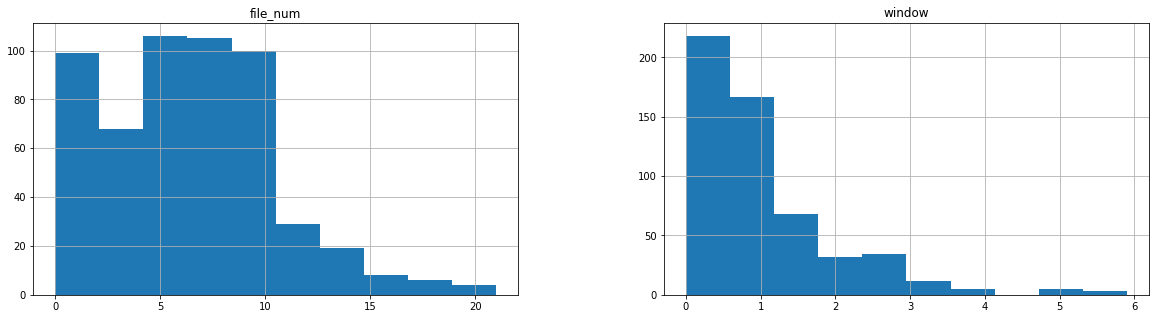

In [20]:
compare_col = ['file_num', 'window']
tmp = estimate_score(0, 'lr_bin_8')
tmp[compare_col].hist(figsize=(20, 5))

In [22]:
tmp = estimate_score(0, 'base_9')


In [53]:
col_name='var006'
para_name = 'momenta_impact_ratio'
tmp = estimate_score(0, 'base_9')
tmp = tmp.loc[tmp.col_name==col_name].sort_values('score_count', ascending=False).reset_index(drop=True)
print(float(tmp.loc[0,para_name]))
#, 'momenta_impact_ratio'].drop_duplicates()

tmp[para_name].drop_duplicates()[:2].values


0.4


array([0.4, 0.3])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7a778d72e8>,
      dtype=object)

/apps/dslab/anaconda/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


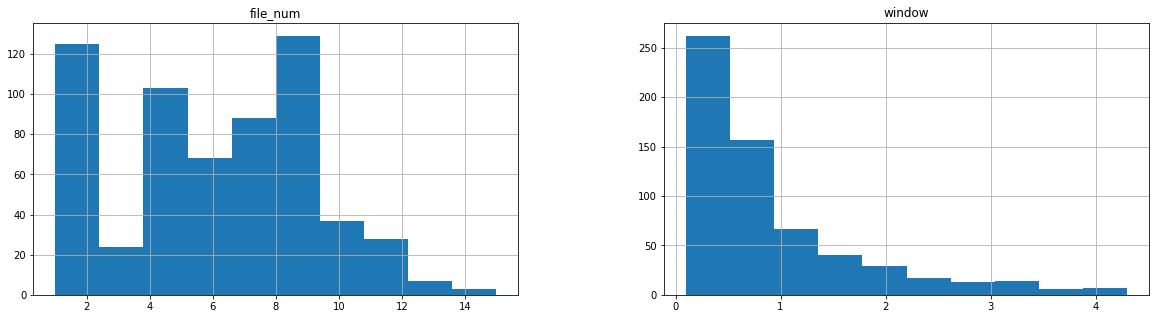

In [43]:
compare_col = ['file_num', 'window']
tmp = estimate_score(0, 'lr_bin_9')
tmp[compare_col].hist(figsize=(20, 5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb0ad4339e8>,
      dtype=object)

/apps/dslab/anaconda/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


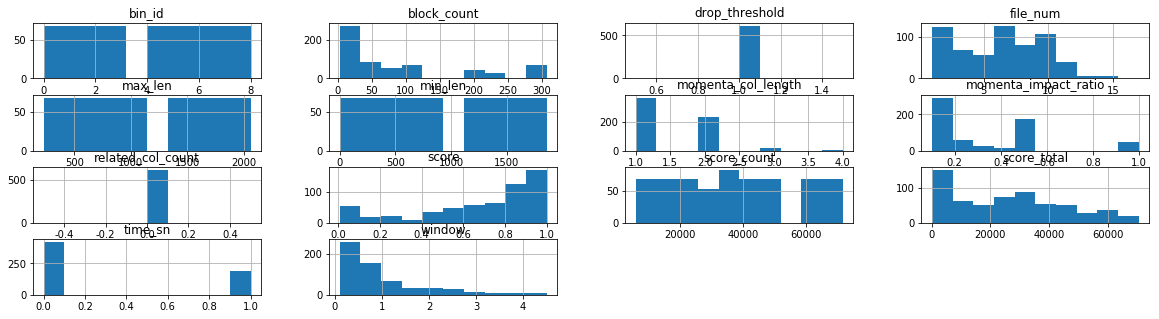

In [8]:
compare_col = ['file_num', 'window']
tmp = estimate_score(0, 'lr_bin_9')
tmp.hist(figsize=(20, 5))

In [13]:
ls = ['bin_id', 'col_name']
ls.extend(['time_sn'])
tmp.head()[ls]

bin_id col_name  time_sn
0     0.0   var001      0.0
1     1.0   var001      0.0
2     2.0   var001      0.0
3     3.0   var001      0.0
4     4.0   var001      0.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fda61d3a780>,
      dtype=object)

/apps/dslab/anaconda/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


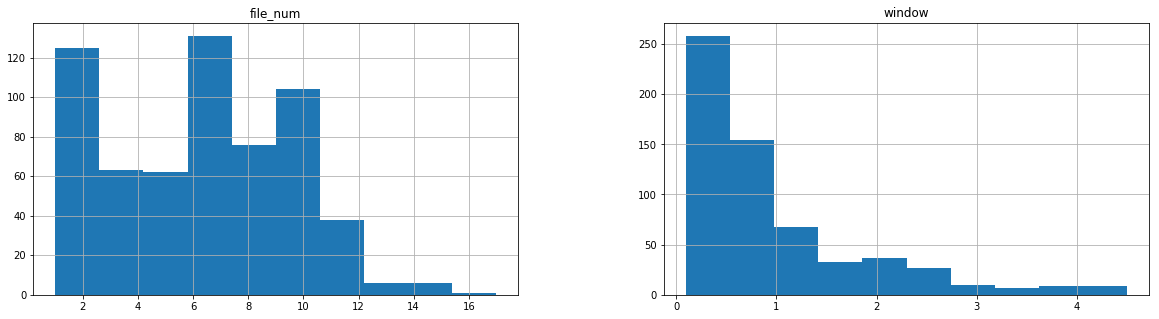

In [2]:
compare_col = ['file_num', 'window']
tmp = estimate_score(0, 'lr_bin_9')
tmp[compare_col].hist(figsize=(20, 5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffa8d235e80>,
      dtype=object)

/apps/dslab/anaconda/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


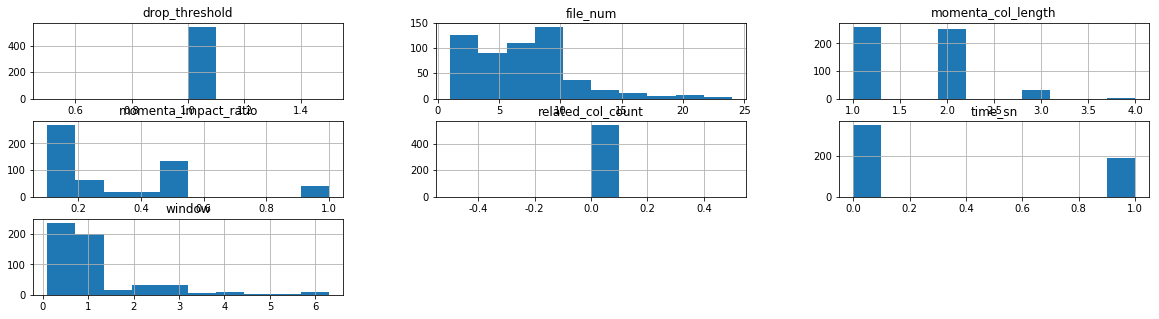

In [201]:
compare_col = ['file_num', 'window']
tmp = estimate_score(0, 'lr_bin_8')
tmp[model_paras].hist(figsize=(20, 5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffa8c80fe80>,
      dtype=object)

/apps/dslab/anaconda/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


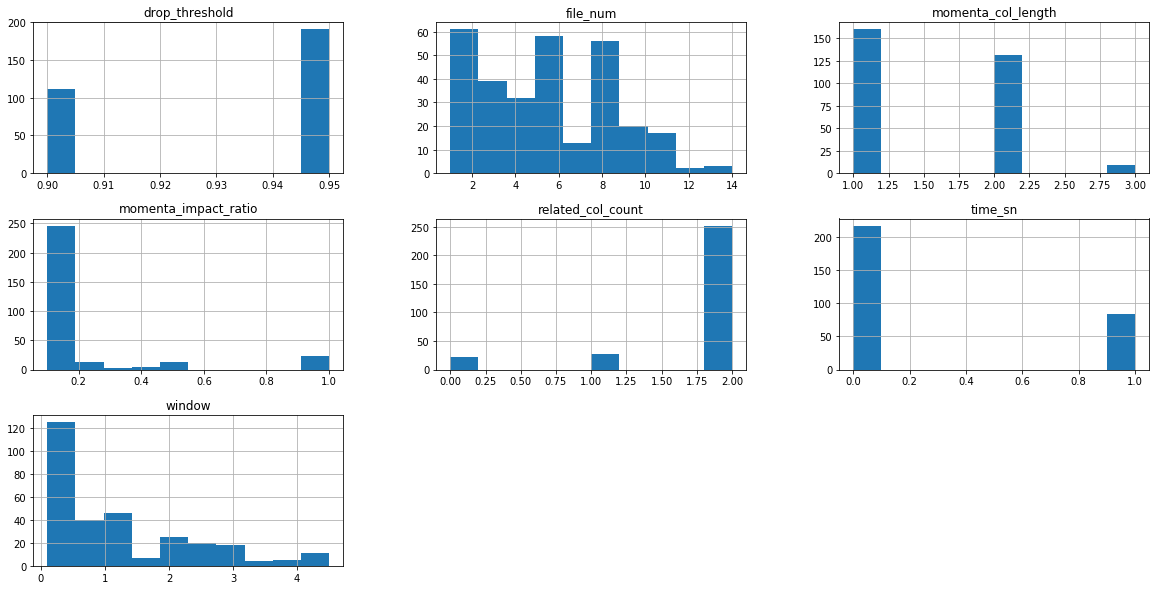

In [199]:
tmp = estimate_score(0, 'lr_bin_9')
tmp[model_paras].hist(figsize=(20, 10))

In [22]:
tmp.window.value_counts()

0.9    184
0.5    113
0.1    105
1.3     84
2.9     34
2.1     24
Name: window, dtype: int64

In [26]:
tmp = estimate_score(0, 'lr_bin_8')
tmp.sort_values('max_len')

bin_id class_name col_name                   ct  drop_threshold       file_num  momenta_col_length  momenta_impact_ratio  related_col_count          score    score_count    score_total        time_sn         window  block_count  max_len  min_len
392   0.000000e+00         lr   var050  1550032392000000000    1.000000e+00   9.000000e+00                 1.0          5.000000e-01       0.000000e+00   8.423000e-01   4.268500e+04   3.595282e+04   0.000000e+00   2.900000e+00        351.0    257.0      1.0
280   0.000000e+00         lr   var036  1550024077000000000    1.000000e+00   1.000000e+00                 1.0          1.000000e-01       0.000000e+00   7.857000e-01   4.126300e+04   3.242196e+04   1.000000e+00   2.000000e-01        336.0    257.0      1.0
224   0.000000e+00         lr   var029  1549980622000000000    1.000000e+00   1.000000e+00                 1.0          4.000000e-01       0.000000e+00   8.876000e-01   4.126300e+04   3.662339e+04   1.000000e+00   1.000000e-01        336.0    257.0      1.0
176   0.000000e+00         lr   var023  1549980707000000000    1.000000e+00   5.000000e+00                 2.0          1.000000e-01       0.000000e+00   5.183000e-01   4.193000e+04   2.173219e+04   1.000000e+00   1.300000e+00        340.0    257.0      1.0
480   0.000000e+00         lr   var061  1549969640000000000    1.000000e+00   3.000000e+00                 1.0          1.000000e-01       0.000000e+00   1.830000e-01   4.074600e+04   7.454760e+03   1.000000e+00   5.000000e-01        346.0    258.0      1.0
25    1.000000e+00         lr   var004  1550033208000000000    1.000000e+00   9.000000e+00                 2.0          5.000000e-01       0.000000e+00   5.540000e-02   7.450800e+04   4.124076e+03   0.000000e+00   2.000000e+00        199.0    515.0    259.0
321   1.000000e+00         lr   var041  1550032532000000000    1.000000e+00   1.000000e+00                 1.0          1.000000e-01       0.000000e+00   4.611000e-01   7.314600e+04   3.372829e+04   0.000000e+00   5.900000e+00        197.0    515.0    259.0
393   1.000000e+00         lr   var050  1550032839000000000    1.000000e+00   9.000000e+00                 1.0          5.000000e-01       0.000000e+00   8.308000e-01   7.450800e+04   6.189767e+04   0.000000e+00   3.100000e+00        199.0    515.0    259.0
417   1.000000e+00         lr   var053      1.549966822e+18    1.000000e+00   1.000000e+00                 1.0          1.000000e+00       0.000000e+00   9.417000e-01   7.314600e+04   6.887900e+04   0.000000e+00   1.000000e-01        197.0    515.0    259.0
473   1.000000e+00         lr   var060  1550027670000000000    1.000000e+00   1.800000e+01                 1.0          1.000000e-01       0.000000e+00   9.861000e-01   7.450800e+04   7.347114e+04   0.000000e+00   1.900000e+00        199.0    515.0    259.0
361   1.000000e+00         lr   var046  1550025780000000000    1.000000e+00   1.000000e+01                 2.0          5.000000e-01       0.000000e+00   5.760000e-02   7.450800e+04   4.288479e+03   0.000000e+00   1.100000e+00        199.0    515.0    259.0
489   1.000000e+00         lr   var062  1550032768000000000    1.000000e+00   1.300000e+01                 1.0          5.000000e-01       0.000000e+00   9.528000e-01   7.789100e+04   7.421337e+04   0.000000e+00   3.500000e+00        210.0    516.0    259.0
225   1.000000e+00         lr   var029  1550025132000000000    1.000000e+00   1.000000e+00                 1.0          4.000000e-01       0.000000e+00   8.815000e-01   7.789100e+04   6.865923e+04   1.000000e+00   1.000000e-01        210.0    516.0    259.0
289   1.000000e+00         lr   var037  1550032658000000000    1.000000e+00   4.000000e+00                 2.0          5.000000e-01       0.000000e+00   9.591000e-01   7.789100e+04   7.470449e+04   1.000000e+00   5.300000e+00        210.0    516.0    259.0
281   1.000000e+00         lr   var036  1550024875000000000    1.000000e+00   1.000000e+00                 1.0          1.000000e-01       0.0

In [142]:
tmp.loc[tmp.col=='var001'].bin_des.value_counts()

(-1.06, 207.0]      286
(207.0, 413.0]      200
(413.0, 619.0]      118
(619.0, 825.0]       68
(825.0, 1031.0]      41
(1031.0, 1237.0]     31
(1237.0, 1443.0]     27
(1443.0, 1649.0]      9
(1649.0, 1855.0]      6
(1855.0, 2061.0]      3
Name: bin_des, dtype: int64

In [8]:
for bin_id in range(0,8):

    for sn, col_name in enumerate(get_predict_col()):
        file = f'./score/lr_bin_8/{bin_id:02}/{col_name}.h5'
        try:
            tmp1 = pd.read_hdf(file,  'score') 
            #print(col_name, tmp1.shape)
        except Exception as e:
            print(bin_id,col_name, 0, 0, file)

1 var053 0 0 ./score/lr_bin_8/01/var053.h5
2 var007 0 0 ./score/lr_bin_8/02/var007.h5


In [27]:
dynamic = get_dynamic_args('var001', 'file_num')
dynamic

(9.0, 9.0)

In [17]:
blk = get_blocks()
blk.loc[blk.]

begin     col  distinct    end     kind     max     min wtid length data_type
0      0  var001      99.0   9546    train  415.89  398.99    1   9547   float64
1   9547  var001       NaN   9764  missing     NaN     NaN    1    218   float64
2   9765  var001      95.0  27673    train  415.89  399.68    1  17909   float64
3  27674  var001       NaN  27958  missing     NaN     NaN    1    285   float64
4  27959  var001      45.0  35878    train  409.17  400.54    1   7920   float64

In [71]:
wtid=1
std = get_std_all()
std.loc[std.wtid == wtid].sort_values('mean', ascending=False).col.head(5).values

array(['var034', 'var043', 'var046', 'var042', 'var004'], dtype=object)

In [8]:
file = './score/lr_bin_8/07/var017.h5'
pd.read_hdf(file, 'score').sort_values(['score', 'window'], ascending=False)

bin_id  block_count class_name col_name               ct  drop_threshold  file_num  max_len  min_len  momenta_col_length  momenta_impact_ratio  related_col_count   score  score_count  score_total  time_sn  window
168     7.0          4.0         lr   var017  1.549954786e+18             1.0       2.0   2061.0   1815.0                 2.0                   0.4                0.0  0.9932       7660.0    7607.6017      1.0     0.1
174     7.0          4.0         lr   var017  1.549954786e+18             1.0       2.0   2061.0   1815.0                 2.0                   0.5                0.0  0.9931       7660.0    7606.7642      1.0     0.1
170     7.0          4.0         lr   var017  1.549954786e+18             1.0       7.0   2061.0   1815.0                 2.0                   0.4                0.0  0.9931       7660.0    7606.7908      1.0     0.1
169     7.0          4.0         lr   var017  1.549954786e+18             1.0       6.0   2061.0   1815.0                 2.0                   0.4                0.0  0.9931       7660.0    7606.7908      1.0     0.1
114     7.0          4.0         lr   var017   1.54995478e+18             1.0       2.0   2061.0   1815.0                 2.0                   0.5                0.0  0.9930       7660.0    7606.7309      1.0     0.9
115     7.0          4.0         lr   var017  1.549954781e+18             1.0       6.0   2061.0   1815.0                 2.0                   0.5                0.0  0.9930       7660.0    7606.7475      1.0     0.9
116     7.0          4.0         lr   var017  1.549954781e+18             1.0       7.0   2061.0   1815.0                 2.0                   0.5                0.0  0.9930       7660.0    7606.7475      1.0     0.9
119     7.0          4.0         lr   var017  1.549954781e+18             1.0       7.0   2061.0   1815.0                 2.0                   0.5                0.0  0.9930       7660.0    7606.7308      0.0     0.9
118     7.0          4.0         lr   var017  1.549954781e+18             1.0       6.0   2061.0   1815.0                 2.0                   0.5                0.0  0.9930       7660.0    7606.7308      0.0     0.9
117     7.0          4.0         lr   var017  1.549954781e+18             1.0       2.0   2061.0   1815.0                 2.0                   0.5                0.0  0.9930       7660.0    7606.7309      0.0     0.9
56      7.0          4.0         lr   var017  1.549954775e+18             1.0       7.0   2061.0   1815.0                 2.0                   0.5                0.0  0.9930       7660.0    7606.7143      1.0     0.5
54      7.0          4.0         lr   var017  1.549954775e+18             1.0       2.0   2061.0   1815.0                 2.0                   0.5                0.0  0.9930       7660.0    7606.7143      1.0     0.5
59      7.0          4.0         lr   var017  1.549954775e+18             1.0       7.0   2061.0   1815.0                 2.0                   0.5                0.0  0.9930       7660.0    7606.7143      0.0     0.5
55      7.0          4.0         lr   var017  1.549954775e+18             1.0       6.0   2061.0   1815.0                 2.0                   0.5                0.0  0.9930       7660.0    7606.7143      1.0     0.5
57      7.0          4.0         lr   var017  1.549954775e+18             1.0       2.0   2061.0   1815.0                 2.0                   0.5                0.0  0.9930       7660.0    7606.7143      0.0     0.5
58      7.0          4.0         lr   var017  1.549954775e+18             1.0       6.0   2061.0   1815.0                 2.0                   0.5                0.0  0.9930       7660.0    7606.7143      0.0     0.5
179     7.0          4.0         lr   var017  1.549954787e+18             1.0       7.0   2061.0   1815.0                 2.0                   0.5                0.0  0.9930       7660.0    7606.7143      0.0     0.1
178     7.0          4.0         lr   var017  1.549954787e+18             1.0    

## Check data for specific bin_id

In [98]:
count = 0
for bin_id in range(0,9):
    for sn, col_name in enumerate(get_predict_col()):
        file = f'./score/lr_bin_9/{bin_id:02}/{col_name}.h5'
        try:
            tmp1 = pd.read_hdf(file,  'score')  
            #print(bin_id, col_name, tmp1.shape)
            count += 1
        except Exception as e:
            pass
           # print('rm ', file, ';')
count/68/9, count

(0.5196078431372549, 318)

In [8]:
for bin_id in range(8, 9):
    for sn, col_name in enumerate(get_predict_col()):
        file = f'./score/lr_bin_8/{bin_id:02}/{col_name}.h5'
        #print(file)
        try:
            tmp1 = pd.read_hdf(file,  'his') 
            tmp2 = pd.read_hdf(file,  'score') 
            print(col_name, tmp1.shape, tmp2.shape)
        except Exception as e:
            #print(e)
            print(bin_id,col_name, 0, 0, file)

ai-prd-02


In [30]:
heart_beart('./score/lr_bin_8/02/var028.h5', 'test')

ct   msg     server
0 2019-02-12 13:14:47  test  ai-prd-02

In [85]:
file = './score/lr_bin_9/05/var018.h5'
try:
    tmp1 = pd.read_hdf(file,  'score') 
    print(tmp1.shape)
except Exception as e:
    print('No score')

tmp1 = pd.read_hdf(file,  '/his') 
tmp1= tmp1.sort_values('ct', ascending=False)

tmp1

(60, 17)


ct                                 msg     server
5 2019-02-16 10:37:33   Existing:60, todo:0, type:float64  ai-prd-06
6 2019-02-16 10:37:33     Done:0/current:60, type:float64  ai-prd-06
3 2019-02-16 09:49:59   Existing:60, todo:0, type:float64  ai-prd-04
4 2019-02-16 09:49:59     Done:0/current:60, type:float64  ai-prd-04
2 2019-02-16 06:56:50    Done:60/current:60, type:float64  ai-prd-04
1 2019-02-16 06:45:12   Existing:0, todo:60, type:float64  ai-prd-04
0 2019-02-16 05:49:56  Existing:0, todo:240, type:float64  ai-prd-04

In [50]:
file = './score/lr_bin_8/05/var029.h5'
tmp1 = pd.read_hdf(file,  'score')
tmp1

ValueError: The file './score/lr_bin_8/05/var029.h5' is already opened, but not in read-only mode (as requested).

In [41]:
get_args_missing('var026',0)

2019-02-12 06:18:45,465 check.py[271] WARNING The file './score/lr_bin_8/05/var029.h5' is already opened, but not in read-only mode (as requested).


Empty DataFrame
Columns: [class_name, col_name, drop_threshold, file_num, momenta_col_length, momenta_impact_ratio, related_col_count, time_sn, window, bin_id]
Index: []

## Block analysis

In [12]:
bk = get_blocks()
 

wtid
22    891714
12    885350
23    867619
25    862360
32    815391
14    809446
2     804522
16    786790
5     786600
31    778308
30    766951
28    743761
18    743074
4     739099
10    733853
9     716186
33    714045
27    681760
17    680073
11    678448
21    675991
29    667594
3     639159
1     618955
7     601205
26    589689
19    589148
8     579404
13    566984
24    533588
6     499068
20    496872
15    487482
Name: length, dtype: int64


/apps/dslab/anaconda/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


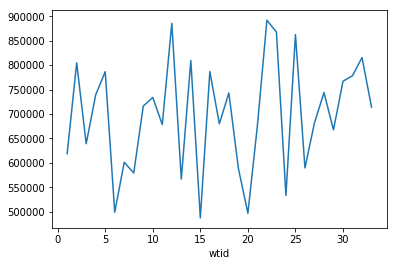

In [12]:
tmp = bk.loc[bk.kind=='missing'].groupby(['wtid']).length.sum()
print(tmp.sort_values(ascending=False))
tmp.plot()

/apps/dslab/anaconda/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


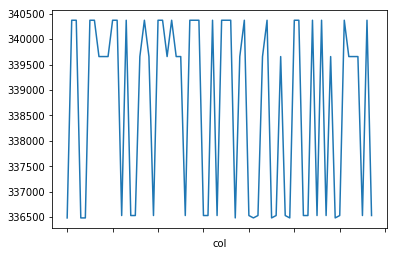

In [9]:
bk.loc[bk.kind=='missing'].groupby(['col']).length.sum().plot()

## Check avg score base on diff wtid

In [36]:
s1_list =[]
s2_list =[]
s3_list =[]
for sn, col_name in enumerate(get_predict_col()):
    s1 = get_best_para(col_name, [1,2,3], top_n=0).score
    s2 = get_best_para(col_name, [30, 31, 32, 33], top_n=0).score
    s3 = get_best_para(col_name, [1,2,3, 30, 31, 32, 33], top_n=0).score
    s1 = round(s1,2)
    s2 = round(s2,2)
    s3 = round(s3,2)
    
    print(sn, s1, s2, s3)
    s1_list.append(round(s1,2))
    s2_list.append(round(s2,2))
    s3_list.append(round(s3,2))
    
    #if np.array(s3_list).sum() > np.array(s1_list).sum() and np.array(s3_list).sum()> np.array(s2_list).sum():
    print(sn, 
          round(np.array(s1_list).sum(),2), 
          round(np.array(s2_list).sum(),2), 
          round(np.array(s3_list).sum(),2), 
          col_name)
        
print(s1_list, '\n', s2_list,'\n' , s3_list)
print(len(s1_list) , len(s2_list),len(s3_list) , )
print(np.array(s1_list).mean() , np.array(s2_list).mean(),np.array(s3_list).mean() , )

0 0.85 0.86 0.85
0 0.85 0.86 0.85 var001
1 0.68 0.68 0.68
1 1.53 1.54 1.53 var002
2 0.52 0.54 0.53
2 2.05 2.08 2.06 var003
3 0.05 0.05 0.05
3 2.1 2.13 2.11 var004
4 0.85 0.85 0.85
4 2.95 2.98 2.96 var005
5 0.84 0.86 0.85
5 3.79 3.84 3.81 var006
6 0.85 0.87 0.86
6 4.64 4.71 4.67 var007
7 0.89 0.9 0.9
7 5.53 5.61 5.57 var008
8 0.97 0.99 0.98
8 6.5 6.6 6.55 var009
9 0.58 0.26 0.58
9 7.08 6.86 7.13 var010
10 0.84 0.86 0.85
10 7.92 7.72 7.98 var011
11 0.84 0.84 0.84
11 8.76 8.56 8.82 var012
12 0.96 0.92 0.96
12 9.72 9.48 9.78 var013
13 0.85 0.87 0.86
13 10.57 10.35 10.64 var014
14 0.09 0.1 0.09
14 10.66 10.45 10.73 var015
15 0.97 0.99 0.98
15 11.63 11.44 11.71 var016
16 0.97 0.98 0.98
16 12.6 12.42 12.69 var017
17 0.93 0.93 0.93
17 13.53 13.35 13.62 var018
18 0.67 0.72 0.7
18 14.2 14.07 14.32 var019
19 0.99 1.0 1.0
19 15.19 15.07 15.32 var020
20 0.69 0.68 0.69
20 15.88 15.75 16.01 var021
21 0.83 0.86 0.85
21 16.71 16.61 16.86 var022
22 0.46 0.3 0.46
22 17.17 16.91 17.32 var023
23 0.6 0.59 0

In [31]:
top_n = 10
print(np.array(s1_list)[top_n-2:top_n] , 
      np.array(s2_list)[top_n-2:top_n],
      np.array(s3_list)[top_n-2:top_n] , )
print(np.array(s1_list)[top_n-2:top_n].mean() , 
      np.array(s2_list)[top_n-2:top_n].mean(),
      np.array(s3_list)[top_n-2:top_n].mean() , )

[0.97 0.58] [0.99 0.26] [0.98 0.58]
0.7749999999999999 0.625 0.78



## Validate  Score Across wtid
 

In [1]:
import sys
import os
import pandas as pd

from bokeh.palettes import Category10


from file_cache.utils.util_pandas import *
from file_cache.cache import file_cache

import matplotlib.pyplot as plt

#Adjust the working folder
file_folder = globals()['_dh'][0]
wk_dir = os.path.dirname(file_folder)
os.chdir(wk_dir)
from core.feature import *
from core.submit import *
logging.getLogger().setLevel(logging.INFO)

import argparse
sys.argv = ['program',  '--wtid', '0',  '-W']

args = options()
 

#estimate_score(0, [1])


2019-02-08 05:57:00,486 util_log.py[61] DEBUG Start the program at:ai-prd-06, 173.36.99.84, with:Load module
2019-02-08 05:57:00,783 config.py[93] ERROR No module named 'core.config_local'
Traceback (most recent call last):
  File "/mapr/hadoopProd1/app/hdpbartwa/bk/df_jf/core/config.py", line 91, in <module>
    from core.config_local import *
ModuleNotFoundError: No module named 'core.config_local'
2019-02-08 05:57:00,785 config.py[94] DEBUG There is no local config


['', '/apps/dslab/anaconda/python3/lib/python36.zip', '/apps/dslab/anaconda/python3/lib/python3.6', '/apps/dslab/anaconda/python3/lib/python3.6/lib-dynload', '/users/hdpsbp/.local/lib/python3.6/site-packages', '/apps/dslab/anaconda/python3/lib/python3.6/site-packages', '/apps/dslab/anaconda/python3/lib/python3.6/site-packages/Mako-1.0.7-py3.6.egg', '/apps/dslab/anaconda/python3/lib/python3.6/site-packages/IPython/extensions', '/users/hdpsbp/.ipython', './df_jf', '../df_jf']


In [2]:




def across_estimate(base_list, estimate_list):

    score_list_original = []

    score_list_estimate = []
    for col_name in get_predict_col():
        old = get_best_para(col_name, base_list, 0)

        new = merge_score_col(col_name, estimate_list)
        logger.debug(f'New len:{col_name},{estimate_list},{len(new)},{new.columns}')
        new = new[
                  (new.class_name ==old.class_name ) & 
                  (new.drop_threshold ==old.drop_threshold ) & 
                  (new.file_num ==old.file_num ) &
                  (new.momenta_col_length ==old.momenta_col_length ) & 
                  (new.momenta_impact_length ==old.momenta_impact_length)  &
                  (new.related_col_count ==old.related_col_count ) & 
                  (new.time_sn ==old.time_sn ) &
                  (new.window ==old.window ) &
                  (new.col_name ==col_name )]
        
        
        #new = new.sort_values('window', ascending=False)

        if len(new) != 1:
            logger.debug(new)
            raise Exception(f'Can not find para in estimate twid:, base_list:{base_list}, estimate_list:{estimate_list}:\n{old}')
        new = new.iloc[0]
        #print(type(new), type(old))
        #print(type(old), type(new))
        score_list_original.append(old.score)
        score_list_estimate.append(new.score)    
#         print(DefaultMunch(None, old) )
#         print('========', len(tmp), old.score, tmp.score, type(old.score), type(new.score))

    #print (score_list_estimate,)
    return np.array(score_list_original).mean(), np.array(score_list_estimate).mean() 
    

   

In [12]:
get

Begin


In [38]:
wtid_list = ['30','31','32','33']
#wtid_list = ['1','2','3']
#estimate_list = [1,2,3,4,5,6,7, 28, 29, 30,31,32,33]
print('Begin')
score_list = []
for wtid in estimate_list:    
    score_list.append((wtid,*across_estimate(','.join(wtid_list), [wtid]) ) )

#print(score_list)
np.array([item[2] for item in score_list]).mean()

Begin


0.6780200980392158

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f825422b470>,
      dtype=object)

/apps/dslab/anaconda/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


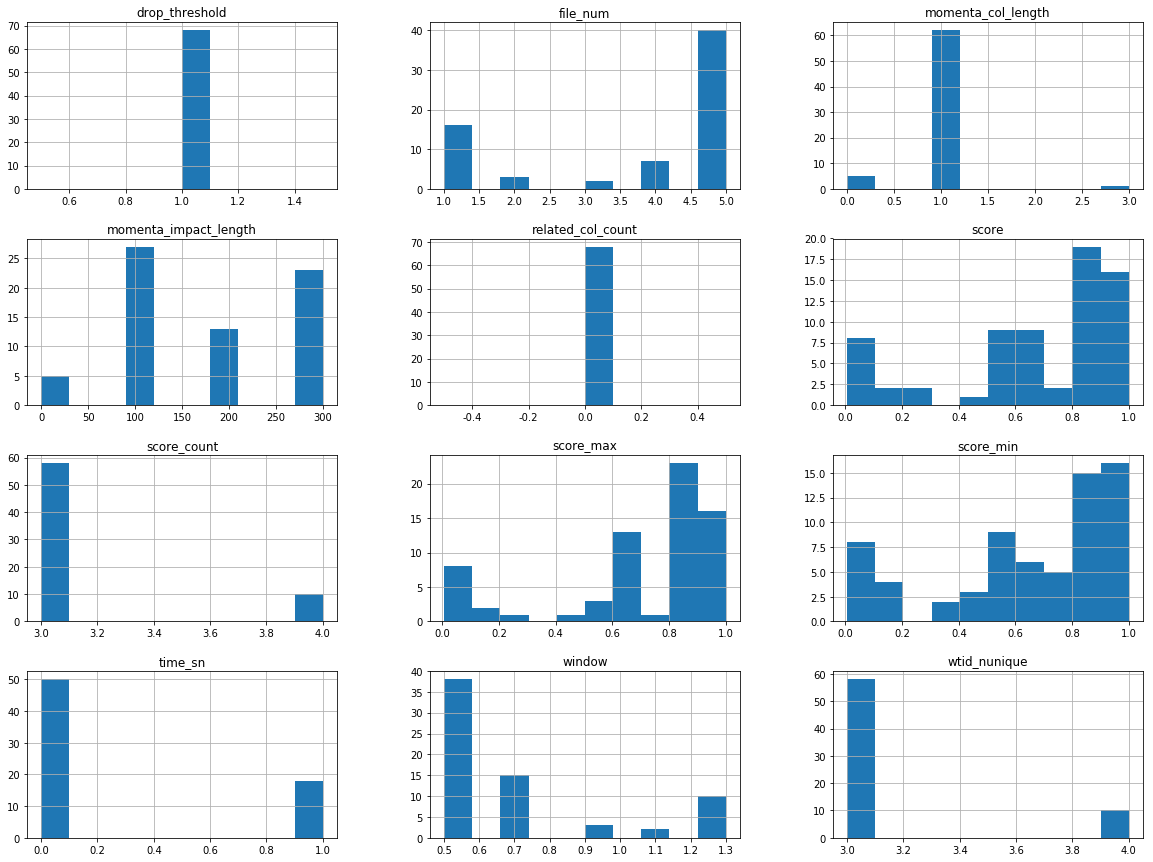

In [13]:
df = summary_all_best_score()
df.drop(axis='column', columns='score_nunique').hist(figsize=(20, 15))

2019-02-05 20:36:21,380 check.py[227] INFO 1,[1]
2019-02-05 20:36:21,422 check.py[241] INFO There are 1 score files for var001, wtid:01
2019-02-05 20:36:21,440 check.py[227] INFO 1,[1]
2019-02-05 20:36:21,463 check.py[241] INFO There are 1 score files for var002, wtid:01
2019-02-05 20:36:21,481 check.py[227] INFO 1,[1]
2019-02-05 20:36:21,504 check.py[241] INFO There are 1 score files for var003, wtid:01
2019-02-05 20:36:21,522 check.py[227] INFO 1,[1]
2019-02-05 20:36:21,545 check.py[241] INFO There are 1 score files for var004, wtid:01
2019-02-05 20:36:21,563 check.py[227] INFO 1,[1]
2019-02-05 20:36:21,585 check.py[241] INFO There are 1 score files for var005, wtid:01
2019-02-05 20:36:21,603 check.py[227] INFO 1,[1]
2019-02-05 20:36:21,626 check.py[241] INFO There are 1 score files for var006, wtid:01
2019-02-05 20:36:21,645 check.py[227] INFO 1,[1]
2019-02-05 20:36:21,667 check.py[241] INFO There are 1 score files for var007, wtid:01
2019-02-05 20:36:21,685 check.py[227] INFO 1,[1]

2019-02-05 20:36:24,054 check.py[241] INFO There are 1 score files for var061, wtid:01
2019-02-05 20:36:24,077 check.py[227] INFO 1,[1]
2019-02-05 20:36:24,099 check.py[241] INFO There are 1 score files for var062, wtid:01
2019-02-05 20:36:24,122 check.py[227] INFO 1,[1]
2019-02-05 20:36:24,144 check.py[241] INFO There are 1 score files for var063, wtid:01
2019-02-05 20:36:24,167 check.py[227] INFO 1,[1]
2019-02-05 20:36:24,188 check.py[241] INFO There are 1 score files for var064, wtid:01
2019-02-05 20:36:24,210 check.py[227] INFO 1,[1]
2019-02-05 20:36:24,232 check.py[241] INFO There are 1 score files for var065, wtid:01
2019-02-05 20:36:24,255 check.py[227] INFO 1,[1]
2019-02-05 20:36:24,277 check.py[241] INFO There are 1 score files for var066, wtid:01
2019-02-05 20:36:24,297 check.py[227] INFO 1,[1]
2019-02-05 20:36:24,322 check.py[241] INFO There are 1 score files for var067, wtid:01
2019-02-05 20:36:24,344 check.py[227] INFO 1,[1]
2019-02-05 20:36:24,367 check.py[241] INFO There

Index(['class_name', 'col_name', 'drop_threshold', 'file_num', 'momenta_col_length', 'momenta_impact_length', 'related_col_count', 'score', 'score_count', 'score_max', 'score_min', 'time_sn', 'window', 'wtid_nunique', 'data_type'], dtype='object')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0987a0ec88>,
      dtype=object)

/apps/dslab/anaconda/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


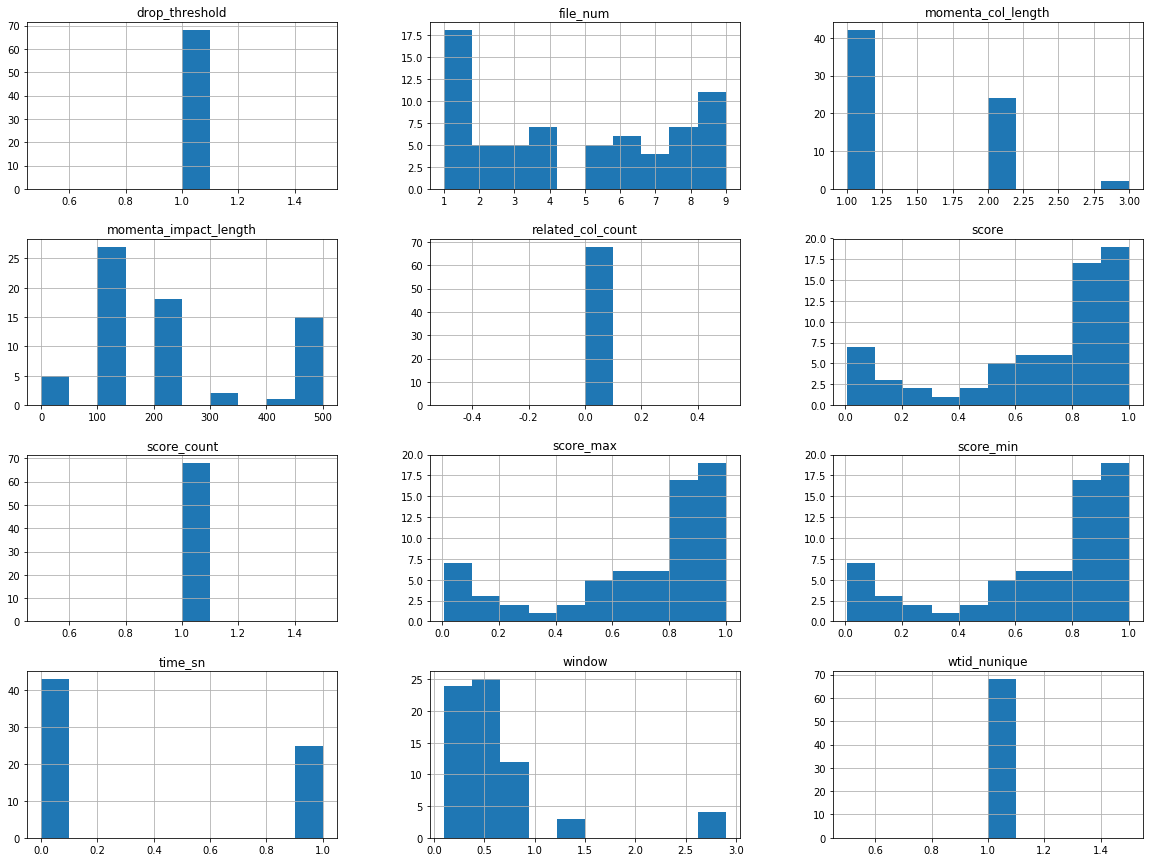

In [10]:
df = summary_all_best_score([1])
print(df.columns)
df.hist(figsize=(20, 15))

In [17]:
tmp=pd.read_hdf('./score/lr/01/var001.h5')
tmp.file_num.value_counts()

9.0    384
8.0    384
7.0    384
6.0    384
5.0    384
4.0    384
3.0    384
2.0    384
1.0    384
Name: file_num, dtype: int64

In [11]:
#momenta_col_length
wtid_list=[1]
val_list =[]
for  i in range(1, 6, 1):
    val = summary_all_best_score(wtid_list, top_n=0,momenta_col_length=i).score.mean()  
    val_list.append(val)

val_list

2019-02-05 20:37:34,653 check.py[227] INFO 1,[1]
2019-02-05 20:37:34,695 check.py[241] INFO There are 1 score files for var001, wtid:01
2019-02-05 20:37:34,713 check.py[227] INFO 1,[1]
2019-02-05 20:37:34,735 check.py[241] INFO There are 1 score files for var002, wtid:01
2019-02-05 20:37:34,753 check.py[227] INFO 1,[1]
2019-02-05 20:37:34,775 check.py[241] INFO There are 1 score files for var003, wtid:01
2019-02-05 20:37:34,792 check.py[227] INFO 1,[1]
2019-02-05 20:37:34,814 check.py[241] INFO There are 1 score files for var004, wtid:01
2019-02-05 20:37:34,830 check.py[227] INFO 1,[1]
2019-02-05 20:37:34,854 check.py[241] INFO There are 1 score files for var005, wtid:01
2019-02-05 20:37:34,870 check.py[227] INFO 1,[1]
2019-02-05 20:37:34,895 check.py[241] INFO There are 1 score files for var006, wtid:01
2019-02-05 20:37:34,912 check.py[227] INFO 1,[1]
2019-02-05 20:37:34,937 check.py[241] INFO There are 1 score files for var007, wtid:01
2019-02-05 20:37:34,955 check.py[227] INFO 1,[1]

2019-02-05 20:37:37,221 check.py[241] INFO There are 1 score files for var061, wtid:01
2019-02-05 20:37:37,241 check.py[227] INFO 1,[1]
2019-02-05 20:37:37,264 check.py[241] INFO There are 1 score files for var062, wtid:01
2019-02-05 20:37:37,286 check.py[227] INFO 1,[1]
2019-02-05 20:37:37,308 check.py[241] INFO There are 1 score files for var063, wtid:01
2019-02-05 20:37:37,329 check.py[227] INFO 1,[1]
2019-02-05 20:37:37,351 check.py[241] INFO There are 1 score files for var064, wtid:01
2019-02-05 20:37:37,373 check.py[227] INFO 1,[1]
2019-02-05 20:37:37,394 check.py[241] INFO There are 1 score files for var065, wtid:01
2019-02-05 20:37:37,415 check.py[227] INFO 1,[1]
2019-02-05 20:37:37,443 check.py[241] INFO There are 1 score files for var066, wtid:01
2019-02-05 20:37:37,491 check.py[227] INFO 1,[1]
2019-02-05 20:37:37,527 check.py[241] INFO There are 1 score files for var067, wtid:01
2019-02-05 20:37:37,555 check.py[227] INFO 1,[1]
2019-02-05 20:37:37,578 check.py[241] INFO There

2019-02-05 20:37:39,820 check.py[227] INFO 1,[1]
2019-02-05 20:37:39,843 check.py[241] INFO There are 1 score files for var054, wtid:01
2019-02-05 20:37:39,865 check.py[227] INFO 1,[1]
2019-02-05 20:37:39,886 check.py[241] INFO There are 1 score files for var055, wtid:01
2019-02-05 20:37:39,908 check.py[227] INFO 1,[1]
2019-02-05 20:37:39,929 check.py[241] INFO There are 1 score files for var056, wtid:01
2019-02-05 20:37:39,950 check.py[227] INFO 1,[1]
2019-02-05 20:37:39,971 check.py[241] INFO There are 1 score files for var057, wtid:01
2019-02-05 20:37:39,992 check.py[227] INFO 1,[1]
2019-02-05 20:37:40,014 check.py[241] INFO There are 1 score files for var058, wtid:01
2019-02-05 20:37:40,035 check.py[227] INFO 1,[1]
2019-02-05 20:37:40,057 check.py[241] INFO There are 1 score files for var059, wtid:01
2019-02-05 20:37:40,079 check.py[227] INFO 1,[1]
2019-02-05 20:37:40,100 check.py[241] INFO There are 1 score files for var060, wtid:01
2019-02-05 20:37:40,121 check.py[227] INFO 1,[1]

2019-02-05 20:37:42,433 check.py[241] INFO There are 1 score files for var046, wtid:01
2019-02-05 20:37:42,454 check.py[227] INFO 1,[1]
2019-02-05 20:37:42,478 check.py[241] INFO There are 1 score files for var047, wtid:01
2019-02-05 20:37:42,497 check.py[227] INFO 1,[1]
2019-02-05 20:37:42,518 check.py[241] INFO There are 1 score files for var048, wtid:01
2019-02-05 20:37:42,540 check.py[227] INFO 1,[1]
2019-02-05 20:37:42,563 check.py[241] INFO There are 1 score files for var049, wtid:01
2019-02-05 20:37:42,585 check.py[227] INFO 1,[1]
2019-02-05 20:37:42,607 check.py[241] INFO There are 1 score files for var050, wtid:01
2019-02-05 20:37:42,628 check.py[227] INFO 1,[1]
2019-02-05 20:37:42,650 check.py[241] INFO There are 1 score files for var051, wtid:01
2019-02-05 20:37:42,672 check.py[227] INFO 1,[1]
2019-02-05 20:37:42,694 check.py[241] INFO There are 1 score files for var052, wtid:01
2019-02-05 20:37:42,716 check.py[227] INFO 1,[1]
2019-02-05 20:37:42,735 check.py[241] INFO There

2019-02-05 20:37:45,033 check.py[227] INFO 1,[1]
2019-02-05 20:37:45,055 check.py[241] INFO There are 1 score files for var039, wtid:01
2019-02-05 20:37:45,076 check.py[227] INFO 1,[1]
2019-02-05 20:37:45,098 check.py[241] INFO There are 1 score files for var040, wtid:01
2019-02-05 20:37:45,120 check.py[227] INFO 1,[1]
2019-02-05 20:37:45,146 check.py[241] INFO There are 1 score files for var041, wtid:01
2019-02-05 20:37:45,167 check.py[227] INFO 1,[1]
2019-02-05 20:37:45,190 check.py[241] INFO There are 1 score files for var042, wtid:01
2019-02-05 20:37:45,211 check.py[227] INFO 1,[1]
2019-02-05 20:37:45,233 check.py[241] INFO There are 1 score files for var043, wtid:01
2019-02-05 20:37:45,256 check.py[227] INFO 1,[1]
2019-02-05 20:37:45,278 check.py[241] INFO There are 1 score files for var044, wtid:01
2019-02-05 20:37:45,300 check.py[227] INFO 1,[1]
2019-02-05 20:37:45,322 check.py[241] INFO There are 1 score files for var045, wtid:01
2019-02-05 20:37:45,343 check.py[227] INFO 1,[1]

2019-02-05 20:37:47,709 check.py[241] INFO There are 1 score files for var031, wtid:01
2019-02-05 20:37:47,730 check.py[227] INFO 1,[1]
2019-02-05 20:37:47,752 check.py[241] INFO There are 1 score files for var032, wtid:01
2019-02-05 20:37:47,773 check.py[227] INFO 1,[1]
2019-02-05 20:37:47,798 check.py[241] INFO There are 1 score files for var033, wtid:01
2019-02-05 20:37:47,819 check.py[227] INFO 1,[1]
2019-02-05 20:37:47,841 check.py[241] INFO There are 1 score files for var034, wtid:01
2019-02-05 20:37:47,861 check.py[227] INFO 1,[1]
2019-02-05 20:37:47,883 check.py[241] INFO There are 1 score files for var035, wtid:01
2019-02-05 20:37:47,905 check.py[227] INFO 1,[1]
2019-02-05 20:37:47,931 check.py[241] INFO There are 1 score files for var036, wtid:01
2019-02-05 20:37:47,952 check.py[227] INFO 1,[1]
2019-02-05 20:37:47,981 check.py[241] INFO There are 1 score files for var037, wtid:01
2019-02-05 20:37:48,003 check.py[227] INFO 1,[1]
2019-02-05 20:37:48,026 check.py[241] INFO There

[0.6791529411764704,
 0.679605882352941,
 0.6796382352941175,
 0.6796382352941175,
 0.6796382352941175]

In [17]:
#file_num
wtid_list=[1]
val_list =[]
for  i in range(1, 10, 1):
    val = summary_all_best_score(wtid_list, top_n=0,file_num=i).score.mean() 
    val_list.append(val)

val_list

2019-02-05 21:49:49,877 check.py[227] INFO 1,[1]
2019-02-05 21:49:49,915 check.py[241] INFO There are 1 score files for var001, wtid:01
2019-02-05 21:49:49,933 check.py[227] INFO 1,[1]
2019-02-05 21:49:49,955 check.py[241] INFO There are 1 score files for var002, wtid:01
2019-02-05 21:49:49,972 check.py[227] INFO 1,[1]
2019-02-05 21:49:49,994 check.py[241] INFO There are 1 score files for var003, wtid:01
2019-02-05 21:49:50,011 check.py[227] INFO 1,[1]
2019-02-05 21:49:50,034 check.py[241] INFO There are 1 score files for var004, wtid:01
2019-02-05 21:49:50,051 check.py[227] INFO 1,[1]
2019-02-05 21:49:50,075 check.py[241] INFO There are 1 score files for var005, wtid:01
2019-02-05 21:49:50,092 check.py[227] INFO 1,[1]
2019-02-05 21:49:50,122 check.py[241] INFO There are 1 score files for var006, wtid:01
2019-02-05 21:49:50,138 check.py[227] INFO 1,[1]
2019-02-05 21:49:50,160 check.py[241] INFO There are 1 score files for var007, wtid:01
2019-02-05 21:49:50,176 check.py[227] INFO 1,[1]

2019-02-05 21:49:52,370 check.py[241] INFO There are 1 score files for var061, wtid:01
2019-02-05 21:49:52,390 check.py[227] INFO 1,[1]
2019-02-05 21:49:52,412 check.py[241] INFO There are 1 score files for var062, wtid:01
2019-02-05 21:49:52,432 check.py[227] INFO 1,[1]
2019-02-05 21:49:52,455 check.py[241] INFO There are 1 score files for var063, wtid:01
2019-02-05 21:49:52,475 check.py[227] INFO 1,[1]
2019-02-05 21:49:52,501 check.py[241] INFO There are 1 score files for var064, wtid:01
2019-02-05 21:49:52,601 check.py[227] INFO 1,[1]
2019-02-05 21:49:52,624 check.py[241] INFO There are 1 score files for var065, wtid:01
2019-02-05 21:49:52,644 check.py[227] INFO 1,[1]
2019-02-05 21:49:52,664 check.py[241] INFO There are 1 score files for var066, wtid:01
2019-02-05 21:49:52,684 check.py[227] INFO 1,[1]
2019-02-05 21:49:52,707 check.py[241] INFO There are 1 score files for var067, wtid:01
2019-02-05 21:49:52,727 check.py[227] INFO 1,[1]
2019-02-05 21:49:52,749 check.py[241] INFO There

2019-02-05 21:49:54,974 check.py[227] INFO 1,[1]
2019-02-05 21:49:54,995 check.py[241] INFO There are 1 score files for var054, wtid:01
2019-02-05 21:49:55,016 check.py[227] INFO 1,[1]
2019-02-05 21:49:55,037 check.py[241] INFO There are 1 score files for var055, wtid:01
2019-02-05 21:49:55,057 check.py[227] INFO 1,[1]
2019-02-05 21:49:55,080 check.py[241] INFO There are 1 score files for var056, wtid:01
2019-02-05 21:49:55,099 check.py[227] INFO 1,[1]
2019-02-05 21:49:55,121 check.py[241] INFO There are 1 score files for var057, wtid:01
2019-02-05 21:49:55,167 check.py[227] INFO 1,[1]
2019-02-05 21:49:55,201 check.py[241] INFO There are 1 score files for var058, wtid:01
2019-02-05 21:49:55,262 check.py[227] INFO 1,[1]
2019-02-05 21:49:55,296 check.py[241] INFO There are 1 score files for var059, wtid:01
2019-02-05 21:49:55,384 check.py[227] INFO 1,[1]
2019-02-05 21:49:55,418 check.py[241] INFO There are 1 score files for var060, wtid:01
2019-02-05 21:49:55,477 check.py[227] INFO 1,[1]

2019-02-05 21:49:58,098 check.py[241] INFO There are 1 score files for var046, wtid:01
2019-02-05 21:49:58,144 check.py[227] INFO 1,[1]
2019-02-05 21:49:58,176 check.py[241] INFO There are 1 score files for var047, wtid:01
2019-02-05 21:49:58,244 check.py[227] INFO 1,[1]
2019-02-05 21:49:58,292 check.py[241] INFO There are 1 score files for var048, wtid:01
2019-02-05 21:49:58,338 check.py[227] INFO 1,[1]
2019-02-05 21:49:58,373 check.py[241] INFO There are 1 score files for var049, wtid:01
2019-02-05 21:49:58,435 check.py[227] INFO 1,[1]
2019-02-05 21:49:58,477 check.py[241] INFO There are 1 score files for var050, wtid:01
2019-02-05 21:49:58,504 check.py[227] INFO 1,[1]
2019-02-05 21:49:58,529 check.py[241] INFO There are 1 score files for var051, wtid:01
2019-02-05 21:49:58,549 check.py[227] INFO 1,[1]
2019-02-05 21:49:58,572 check.py[241] INFO There are 1 score files for var052, wtid:01
2019-02-05 21:49:58,592 check.py[227] INFO 1,[1]
2019-02-05 21:49:58,612 check.py[241] INFO There

2019-02-05 21:50:01,634 check.py[227] INFO 1,[1]
2019-02-05 21:50:01,656 check.py[241] INFO There are 1 score files for var039, wtid:01
2019-02-05 21:50:01,676 check.py[227] INFO 1,[1]
2019-02-05 21:50:01,699 check.py[241] INFO There are 1 score files for var040, wtid:01
2019-02-05 21:50:01,720 check.py[227] INFO 1,[1]
2019-02-05 21:50:01,744 check.py[241] INFO There are 1 score files for var041, wtid:01
2019-02-05 21:50:01,767 check.py[227] INFO 1,[1]
2019-02-05 21:50:01,792 check.py[241] INFO There are 1 score files for var042, wtid:01
2019-02-05 21:50:01,815 check.py[227] INFO 1,[1]
2019-02-05 21:50:01,839 check.py[241] INFO There are 1 score files for var043, wtid:01
2019-02-05 21:50:01,862 check.py[227] INFO 1,[1]
2019-02-05 21:50:01,884 check.py[241] INFO There are 1 score files for var044, wtid:01
2019-02-05 21:50:01,909 check.py[227] INFO 1,[1]
2019-02-05 21:50:01,961 check.py[241] INFO There are 1 score files for var045, wtid:01
2019-02-05 21:50:02,033 check.py[227] INFO 1,[1]

2019-02-05 21:50:04,650 check.py[241] INFO There are 1 score files for var031, wtid:01
2019-02-05 21:50:04,670 check.py[227] INFO 1,[1]
2019-02-05 21:50:04,692 check.py[241] INFO There are 1 score files for var032, wtid:01
2019-02-05 21:50:04,712 check.py[227] INFO 1,[1]
2019-02-05 21:50:04,735 check.py[241] INFO There are 1 score files for var033, wtid:01
2019-02-05 21:50:04,755 check.py[227] INFO 1,[1]
2019-02-05 21:50:04,780 check.py[241] INFO There are 1 score files for var034, wtid:01
2019-02-05 21:50:04,800 check.py[227] INFO 1,[1]
2019-02-05 21:50:04,823 check.py[241] INFO There are 1 score files for var035, wtid:01
2019-02-05 21:50:04,844 check.py[227] INFO 1,[1]
2019-02-05 21:50:04,868 check.py[241] INFO There are 1 score files for var036, wtid:01
2019-02-05 21:50:04,894 check.py[227] INFO 1,[1]
2019-02-05 21:50:04,918 check.py[241] INFO There are 1 score files for var037, wtid:01
2019-02-05 21:50:04,944 check.py[227] INFO 1,[1]
2019-02-05 21:50:04,977 check.py[241] INFO There

2019-02-05 21:50:07,745 check.py[227] INFO 1,[1]
2019-02-05 21:50:07,767 check.py[241] INFO There are 1 score files for var024, wtid:01
2019-02-05 21:50:07,787 check.py[227] INFO 1,[1]
2019-02-05 21:50:07,808 check.py[241] INFO There are 1 score files for var025, wtid:01
2019-02-05 21:50:07,828 check.py[227] INFO 1,[1]
2019-02-05 21:50:07,853 check.py[241] INFO There are 1 score files for var026, wtid:01
2019-02-05 21:50:07,873 check.py[227] INFO 1,[1]
2019-02-05 21:50:07,897 check.py[241] INFO There are 1 score files for var027, wtid:01
2019-02-05 21:50:07,917 check.py[227] INFO 1,[1]
2019-02-05 21:50:07,939 check.py[241] INFO There are 1 score files for var028, wtid:01
2019-02-05 21:50:07,959 check.py[227] INFO 1,[1]
2019-02-05 21:50:07,984 check.py[241] INFO There are 1 score files for var029, wtid:01
2019-02-05 21:50:08,003 check.py[227] INFO 1,[1]
2019-02-05 21:50:08,026 check.py[241] INFO There are 1 score files for var030, wtid:01
2019-02-05 21:50:08,045 check.py[227] INFO 1,[1]

2019-02-05 21:50:10,385 check.py[241] INFO There are 1 score files for var016, wtid:01
2019-02-05 21:50:10,401 check.py[227] INFO 1,[1]
2019-02-05 21:50:10,424 check.py[241] INFO There are 1 score files for var017, wtid:01
2019-02-05 21:50:10,443 check.py[227] INFO 1,[1]
2019-02-05 21:50:10,474 check.py[241] INFO There are 1 score files for var018, wtid:01
2019-02-05 21:50:10,493 check.py[227] INFO 1,[1]
2019-02-05 21:50:10,516 check.py[241] INFO There are 1 score files for var019, wtid:01
2019-02-05 21:50:10,536 check.py[227] INFO 1,[1]
2019-02-05 21:50:10,557 check.py[241] INFO There are 1 score files for var020, wtid:01
2019-02-05 21:50:10,574 check.py[227] INFO 1,[1]
2019-02-05 21:50:10,596 check.py[241] INFO There are 1 score files for var021, wtid:01
2019-02-05 21:50:10,616 check.py[227] INFO 1,[1]
2019-02-05 21:50:10,637 check.py[241] INFO There are 1 score files for var022, wtid:01
2019-02-05 21:50:10,657 check.py[227] INFO 1,[1]
2019-02-05 21:50:10,679 check.py[241] INFO There

2019-02-05 21:50:13,747 check.py[227] INFO 1,[1]
2019-02-05 21:50:13,770 check.py[241] INFO There are 1 score files for var009, wtid:01
2019-02-05 21:50:13,789 check.py[227] INFO 1,[1]
2019-02-05 21:50:13,810 check.py[241] INFO There are 1 score files for var010, wtid:01
2019-02-05 21:50:13,829 check.py[227] INFO 1,[1]
2019-02-05 21:50:13,851 check.py[241] INFO There are 1 score files for var011, wtid:01
2019-02-05 21:50:13,871 check.py[227] INFO 1,[1]
2019-02-05 21:50:13,892 check.py[241] INFO There are 1 score files for var012, wtid:01
2019-02-05 21:50:13,911 check.py[227] INFO 1,[1]
2019-02-05 21:50:13,933 check.py[241] INFO There are 1 score files for var013, wtid:01
2019-02-05 21:50:13,953 check.py[227] INFO 1,[1]
2019-02-05 21:50:13,979 check.py[241] INFO There are 1 score files for var014, wtid:01
2019-02-05 21:50:13,999 check.py[227] INFO 1,[1]
2019-02-05 21:50:14,021 check.py[241] INFO There are 1 score files for var015, wtid:01
2019-02-05 21:50:14,041 check.py[227] INFO 1,[1]

2019-02-05 21:50:17,065 check.py[241] INFO There are 1 score files for var001, wtid:01
2019-02-05 21:50:17,084 check.py[227] INFO 1,[1]
2019-02-05 21:50:17,106 check.py[241] INFO There are 1 score files for var002, wtid:01
2019-02-05 21:50:17,125 check.py[227] INFO 1,[1]
2019-02-05 21:50:17,146 check.py[241] INFO There are 1 score files for var003, wtid:01
2019-02-05 21:50:17,165 check.py[227] INFO 1,[1]
2019-02-05 21:50:17,188 check.py[241] INFO There are 1 score files for var004, wtid:01
2019-02-05 21:50:17,207 check.py[227] INFO 1,[1]
2019-02-05 21:50:17,230 check.py[241] INFO There are 1 score files for var005, wtid:01
2019-02-05 21:50:17,249 check.py[227] INFO 1,[1]
2019-02-05 21:50:17,276 check.py[241] INFO There are 1 score files for var006, wtid:01
2019-02-05 21:50:17,296 check.py[227] INFO 1,[1]
2019-02-05 21:50:17,317 check.py[241] INFO There are 1 score files for var007, wtid:01
2019-02-05 21:50:17,336 check.py[227] INFO 1,[1]
2019-02-05 21:50:17,358 check.py[241] INFO There

2019-02-05 21:50:19,679 check.py[227] INFO 1,[1]
2019-02-05 21:50:19,700 check.py[241] INFO There are 1 score files for var062, wtid:01
2019-02-05 21:50:19,723 check.py[227] INFO 1,[1]
2019-02-05 21:50:19,948 check.py[241] INFO There are 1 score files for var063, wtid:01
2019-02-05 21:50:19,972 check.py[227] INFO 1,[1]
2019-02-05 21:50:19,995 check.py[241] INFO There are 1 score files for var064, wtid:01
2019-02-05 21:50:20,018 check.py[227] INFO 1,[1]
2019-02-05 21:50:20,041 check.py[241] INFO There are 1 score files for var065, wtid:01
2019-02-05 21:50:20,071 check.py[227] INFO 1,[1]
2019-02-05 21:50:20,103 check.py[241] INFO There are 1 score files for var066, wtid:01
2019-02-05 21:50:20,153 check.py[227] INFO 1,[1]
2019-02-05 21:50:20,186 check.py[241] INFO There are 1 score files for var067, wtid:01
2019-02-05 21:50:20,241 check.py[227] INFO 1,[1]
2019-02-05 21:50:20,278 check.py[241] INFO There are 1 score files for var068, wtid:01


[0.6635264705882351,
 0.673675,
 0.676566176470588,
 0.6779176470588235,
 0.6788485294117648,
 0.6791647058823528,
 0.679380882352941,
 0.6795294117647056,
 0.6796382352941175]

In [19]:
#file_num
wtid_list=[2]
val_list =[]
for  i in range(1, 10, 1):
    val = summary_all_best_score(wtid_list, top_n=0,file_num=i).score.mean() 
    val_list.append(val)

val_list

2019-02-05 21:53:28,849 check.py[227] INFO 2,[2]
2019-02-05 21:53:28,880 check.py[241] INFO There are 1 score files for var001, wtid:02
2019-02-05 21:53:28,898 check.py[227] INFO 2,[2]
2019-02-05 21:53:28,927 check.py[241] INFO There are 1 score files for var002, wtid:02
2019-02-05 21:53:28,943 check.py[227] INFO 2,[2]
2019-02-05 21:53:28,992 check.py[241] INFO There are 1 score files for var003, wtid:02
2019-02-05 21:53:29,009 check.py[227] INFO 2,[2]
2019-02-05 21:53:29,071 check.py[241] INFO There are 1 score files for var004, wtid:02
2019-02-05 21:53:29,088 check.py[227] INFO 2,[2]
2019-02-05 21:53:29,111 check.py[241] INFO There are 1 score files for var005, wtid:02
2019-02-05 21:53:29,128 check.py[227] INFO 2,[2]
2019-02-05 21:53:29,150 check.py[241] INFO There are 1 score files for var006, wtid:02
2019-02-05 21:53:29,167 check.py[227] INFO 2,[2]
2019-02-05 21:53:29,191 check.py[241] INFO There are 1 score files for var007, wtid:02
2019-02-05 21:53:29,207 check.py[227] INFO 2,[2]

2019-02-05 21:53:33,081 check.py[241] INFO There are 1 score files for var061, wtid:02
2019-02-05 21:53:33,102 check.py[227] INFO 2,[2]
2019-02-05 21:53:33,143 check.py[241] INFO There are 1 score files for var062, wtid:02
2019-02-05 21:53:33,164 check.py[227] INFO 2,[2]
2019-02-05 21:53:33,185 check.py[241] INFO There are 1 score files for var063, wtid:02
2019-02-05 21:53:33,206 check.py[227] INFO 2,[2]
2019-02-05 21:53:33,227 check.py[241] INFO There are 1 score files for var064, wtid:02
2019-02-05 21:53:33,249 check.py[227] INFO 2,[2]
2019-02-05 21:53:33,282 check.py[241] INFO There are 1 score files for var065, wtid:02
2019-02-05 21:53:33,304 check.py[227] INFO 2,[2]
2019-02-05 21:53:33,323 check.py[241] INFO There are 1 score files for var066, wtid:02
2019-02-05 21:53:33,343 check.py[227] INFO 2,[2]
2019-02-05 21:53:33,366 check.py[241] INFO There are 1 score files for var067, wtid:02
2019-02-05 21:53:33,388 check.py[227] INFO 2,[2]
2019-02-05 21:53:33,424 check.py[241] INFO There

2019-02-05 21:53:35,572 check.py[227] INFO 2,[2]
2019-02-05 21:53:35,592 check.py[241] INFO There are 1 score files for var054, wtid:02
2019-02-05 21:53:35,612 check.py[227] INFO 2,[2]
2019-02-05 21:53:35,632 check.py[241] INFO There are 1 score files for var055, wtid:02
2019-02-05 21:53:35,652 check.py[227] INFO 2,[2]
2019-02-05 21:53:35,673 check.py[241] INFO There are 1 score files for var056, wtid:02
2019-02-05 21:53:35,694 check.py[227] INFO 2,[2]
2019-02-05 21:53:35,715 check.py[241] INFO There are 1 score files for var057, wtid:02
2019-02-05 21:53:35,736 check.py[227] INFO 2,[2]
2019-02-05 21:53:35,757 check.py[241] INFO There are 1 score files for var058, wtid:02
2019-02-05 21:53:35,778 check.py[227] INFO 2,[2]
2019-02-05 21:53:35,799 check.py[241] INFO There are 1 score files for var059, wtid:02
2019-02-05 21:53:35,819 check.py[227] INFO 2,[2]
2019-02-05 21:53:35,841 check.py[241] INFO There are 1 score files for var060, wtid:02
2019-02-05 21:53:35,862 check.py[227] INFO 2,[2]

2019-02-05 21:53:38,038 check.py[241] INFO There are 1 score files for var046, wtid:02
2019-02-05 21:53:38,058 check.py[227] INFO 2,[2]
2019-02-05 21:53:38,077 check.py[241] INFO There are 1 score files for var047, wtid:02
2019-02-05 21:53:38,097 check.py[227] INFO 2,[2]
2019-02-05 21:53:38,127 check.py[241] INFO There are 1 score files for var048, wtid:02
2019-02-05 21:53:38,147 check.py[227] INFO 2,[2]
2019-02-05 21:53:38,169 check.py[241] INFO There are 1 score files for var049, wtid:02
2019-02-05 21:53:38,190 check.py[227] INFO 2,[2]
2019-02-05 21:53:38,212 check.py[241] INFO There are 1 score files for var050, wtid:02
2019-02-05 21:53:38,233 check.py[227] INFO 2,[2]
2019-02-05 21:53:38,254 check.py[241] INFO There are 1 score files for var051, wtid:02
2019-02-05 21:53:38,275 check.py[227] INFO 2,[2]
2019-02-05 21:53:38,296 check.py[241] INFO There are 1 score files for var052, wtid:02
2019-02-05 21:53:38,317 check.py[227] INFO 2,[2]
2019-02-05 21:53:38,336 check.py[241] INFO There

2019-02-05 21:53:40,846 check.py[227] INFO 2,[2]
2019-02-05 21:53:40,867 check.py[241] INFO There are 1 score files for var039, wtid:02
2019-02-05 21:53:40,887 check.py[227] INFO 2,[2]
2019-02-05 21:53:40,910 check.py[241] INFO There are 1 score files for var040, wtid:02
2019-02-05 21:53:40,931 check.py[227] INFO 2,[2]
2019-02-05 21:53:40,956 check.py[241] INFO There are 1 score files for var041, wtid:02
2019-02-05 21:53:40,977 check.py[227] INFO 2,[2]
2019-02-05 21:53:40,998 check.py[241] INFO There are 1 score files for var042, wtid:02
2019-02-05 21:53:41,018 check.py[227] INFO 2,[2]
2019-02-05 21:53:41,039 check.py[241] INFO There are 1 score files for var043, wtid:02
2019-02-05 21:53:41,060 check.py[227] INFO 2,[2]
2019-02-05 21:53:41,082 check.py[241] INFO There are 1 score files for var044, wtid:02
2019-02-05 21:53:41,103 check.py[227] INFO 2,[2]
2019-02-05 21:53:41,124 check.py[241] INFO There are 1 score files for var045, wtid:02
2019-02-05 21:53:41,145 check.py[227] INFO 2,[2]

2019-02-05 21:53:43,888 check.py[241] INFO There are 1 score files for var031, wtid:02
2019-02-05 21:53:43,908 check.py[227] INFO 2,[2]
2019-02-05 21:53:43,932 check.py[241] INFO There are 1 score files for var032, wtid:02
2019-02-05 21:53:43,952 check.py[227] INFO 2,[2]
2019-02-05 21:53:43,979 check.py[241] INFO There are 1 score files for var033, wtid:02
2019-02-05 21:53:43,999 check.py[227] INFO 2,[2]
2019-02-05 21:53:44,020 check.py[241] INFO There are 1 score files for var034, wtid:02
2019-02-05 21:53:44,040 check.py[227] INFO 2,[2]
2019-02-05 21:53:44,061 check.py[241] INFO There are 1 score files for var035, wtid:02
2019-02-05 21:53:44,081 check.py[227] INFO 2,[2]
2019-02-05 21:53:44,101 check.py[241] INFO There are 1 score files for var036, wtid:02
2019-02-05 21:53:44,121 check.py[227] INFO 2,[2]
2019-02-05 21:53:44,145 check.py[241] INFO There are 1 score files for var037, wtid:02
2019-02-05 21:53:44,165 check.py[227] INFO 2,[2]
2019-02-05 21:53:44,189 check.py[241] INFO There

2019-02-05 21:53:46,427 check.py[227] INFO 2,[2]
2019-02-05 21:53:46,448 check.py[241] INFO There are 1 score files for var024, wtid:02
2019-02-05 21:53:46,468 check.py[227] INFO 2,[2]
2019-02-05 21:53:46,490 check.py[241] INFO There are 1 score files for var025, wtid:02
2019-02-05 21:53:46,511 check.py[227] INFO 2,[2]
2019-02-05 21:53:46,533 check.py[241] INFO There are 1 score files for var026, wtid:02
2019-02-05 21:53:46,553 check.py[227] INFO 2,[2]
2019-02-05 21:53:46,575 check.py[241] INFO There are 1 score files for var027, wtid:02
2019-02-05 21:53:46,595 check.py[227] INFO 2,[2]
2019-02-05 21:53:46,618 check.py[241] INFO There are 1 score files for var028, wtid:02
2019-02-05 21:53:46,638 check.py[227] INFO 2,[2]
2019-02-05 21:53:46,660 check.py[241] INFO There are 1 score files for var029, wtid:02
2019-02-05 21:53:46,680 check.py[227] INFO 2,[2]
2019-02-05 21:53:46,702 check.py[241] INFO There are 1 score files for var030, wtid:02
2019-02-05 21:53:46,722 check.py[227] INFO 2,[2]

2019-02-05 21:53:49,004 check.py[241] INFO There are 1 score files for var016, wtid:02
2019-02-05 21:53:49,022 check.py[227] INFO 2,[2]
2019-02-05 21:53:49,043 check.py[241] INFO There are 1 score files for var017, wtid:02
2019-02-05 21:53:49,062 check.py[227] INFO 2,[2]
2019-02-05 21:53:49,084 check.py[241] INFO There are 1 score files for var018, wtid:02
2019-02-05 21:53:49,103 check.py[227] INFO 2,[2]
2019-02-05 21:53:49,127 check.py[241] INFO There are 1 score files for var019, wtid:02
2019-02-05 21:53:49,147 check.py[227] INFO 2,[2]
2019-02-05 21:53:49,166 check.py[241] INFO There are 1 score files for var020, wtid:02
2019-02-05 21:53:49,184 check.py[227] INFO 2,[2]
2019-02-05 21:53:49,207 check.py[241] INFO There are 1 score files for var021, wtid:02
2019-02-05 21:53:49,228 check.py[227] INFO 2,[2]
2019-02-05 21:53:49,249 check.py[241] INFO There are 1 score files for var022, wtid:02
2019-02-05 21:53:49,270 check.py[227] INFO 2,[2]
2019-02-05 21:53:49,292 check.py[241] INFO There

2019-02-05 21:53:51,650 check.py[227] INFO 2,[2]
2019-02-05 21:53:51,672 check.py[241] INFO There are 1 score files for var009, wtid:02
2019-02-05 21:53:51,692 check.py[227] INFO 2,[2]
2019-02-05 21:53:51,716 check.py[241] INFO There are 1 score files for var010, wtid:02
2019-02-05 21:53:51,736 check.py[227] INFO 2,[2]
2019-02-05 21:53:51,757 check.py[241] INFO There are 1 score files for var011, wtid:02
2019-02-05 21:53:51,777 check.py[227] INFO 2,[2]
2019-02-05 21:53:51,799 check.py[241] INFO There are 1 score files for var012, wtid:02
2019-02-05 21:53:51,819 check.py[227] INFO 2,[2]
2019-02-05 21:53:51,840 check.py[241] INFO There are 1 score files for var013, wtid:02
2019-02-05 21:53:51,860 check.py[227] INFO 2,[2]
2019-02-05 21:53:51,880 check.py[241] INFO There are 1 score files for var014, wtid:02
2019-02-05 21:53:51,900 check.py[227] INFO 2,[2]
2019-02-05 21:53:51,921 check.py[241] INFO There are 1 score files for var015, wtid:02
2019-02-05 21:53:51,941 check.py[227] INFO 2,[2]

2019-02-05 21:53:54,274 check.py[241] INFO There are 1 score files for var001, wtid:02
2019-02-05 21:53:54,293 check.py[227] INFO 2,[2]
2019-02-05 21:53:54,317 check.py[241] INFO There are 1 score files for var002, wtid:02
2019-02-05 21:53:54,336 check.py[227] INFO 2,[2]
2019-02-05 21:53:54,357 check.py[241] INFO There are 1 score files for var003, wtid:02
2019-02-05 21:53:54,376 check.py[227] INFO 2,[2]
2019-02-05 21:53:54,400 check.py[241] INFO There are 1 score files for var004, wtid:02
2019-02-05 21:53:54,419 check.py[227] INFO 2,[2]
2019-02-05 21:53:54,444 check.py[241] INFO There are 1 score files for var005, wtid:02
2019-02-05 21:53:54,464 check.py[227] INFO 2,[2]
2019-02-05 21:53:54,486 check.py[241] INFO There are 1 score files for var006, wtid:02
2019-02-05 21:53:54,505 check.py[227] INFO 2,[2]
2019-02-05 21:53:54,526 check.py[241] INFO There are 1 score files for var007, wtid:02
2019-02-05 21:53:54,546 check.py[227] INFO 2,[2]
2019-02-05 21:53:54,567 check.py[241] INFO There

2019-02-05 21:53:56,849 check.py[227] INFO 2,[2]
2019-02-05 21:53:56,871 check.py[241] INFO There are 1 score files for var062, wtid:02
2019-02-05 21:53:56,894 check.py[227] INFO 2,[2]
2019-02-05 21:53:56,914 check.py[241] INFO There are 1 score files for var063, wtid:02
2019-02-05 21:53:56,938 check.py[227] INFO 2,[2]
2019-02-05 21:53:56,960 check.py[241] INFO There are 1 score files for var064, wtid:02
2019-02-05 21:53:56,983 check.py[227] INFO 2,[2]
2019-02-05 21:53:57,005 check.py[241] INFO There are 1 score files for var065, wtid:02
2019-02-05 21:53:57,029 check.py[227] INFO 2,[2]
2019-02-05 21:53:57,047 check.py[241] INFO There are 1 score files for var066, wtid:02
2019-02-05 21:53:57,067 check.py[227] INFO 2,[2]
2019-02-05 21:53:57,088 check.py[241] INFO There are 1 score files for var067, wtid:02
2019-02-05 21:53:57,112 check.py[227] INFO 2,[2]
2019-02-05 21:53:57,133 check.py[241] INFO There are 1 score files for var068, wtid:02


[0.6714764705882355,
 0.6820014705882355,
 0.6840588235294118,
 0.6854088235294118,
 0.6864411764705883,
 0.6866926470588236,
 0.6869308823529412,
 0.6872014705882353,
 0.6873088235294118]

In [18]:
#file_num
wtid_list=[1,2]
val_list =[]
for  i in range(1, 10, 1):
    val = summary_all_best_score(wtid_list, top_n=0,file_num=i).score.mean() 
    val_list.append(val)

val_list

2019-02-05 21:51:07,396 check.py[227] INFO 1,[1, 2]
2019-02-05 21:51:07,431 check.py[227] INFO 2,[1, 2]
2019-02-05 21:51:07,526 check.py[241] INFO There are 2 score files for var001, wtid:02
2019-02-05 21:51:07,543 check.py[227] INFO 1,[1, 2]
2019-02-05 21:51:07,565 check.py[227] INFO 2,[1, 2]
2019-02-05 21:51:07,661 check.py[241] INFO There are 2 score files for var002, wtid:02
2019-02-05 21:51:07,677 check.py[227] INFO 1,[1, 2]
2019-02-05 21:51:07,699 check.py[227] INFO 2,[1, 2]
2019-02-05 21:51:07,794 check.py[241] INFO There are 2 score files for var003, wtid:02
2019-02-05 21:51:07,809 check.py[227] INFO 1,[1, 2]
2019-02-05 21:51:07,831 check.py[227] INFO 2,[1, 2]
2019-02-05 21:51:07,931 check.py[241] INFO There are 2 score files for var004, wtid:02
2019-02-05 21:51:07,947 check.py[227] INFO 1,[1, 2]
2019-02-05 21:51:07,970 check.py[227] INFO 2,[1, 2]
2019-02-05 21:51:08,072 check.py[241] INFO There are 2 score files for var005, wtid:02
2019-02-05 21:51:08,089 check.py[227] INFO 1,

2019-02-05 21:51:14,582 check.py[227] INFO 1,[1, 2]
2019-02-05 21:51:14,612 check.py[227] INFO 2,[1, 2]
2019-02-05 21:51:14,749 check.py[241] INFO There are 2 score files for var044, wtid:02
2019-02-05 21:51:14,794 check.py[227] INFO 1,[1, 2]
2019-02-05 21:51:14,827 check.py[227] INFO 2,[1, 2]
2019-02-05 21:51:15,128 check.py[241] INFO There are 2 score files for var045, wtid:02
2019-02-05 21:51:15,223 check.py[227] INFO 1,[1, 2]
2019-02-05 21:51:15,266 check.py[227] INFO 2,[1, 2]
2019-02-05 21:51:15,502 check.py[241] INFO There are 2 score files for var046, wtid:02
2019-02-05 21:51:15,548 check.py[227] INFO 1,[1, 2]
2019-02-05 21:51:15,588 check.py[227] INFO 2,[1, 2]
2019-02-05 21:51:15,657 check.py[241] INFO There are 2 score files for var047, wtid:02
2019-02-05 21:51:15,704 check.py[227] INFO 1,[1, 2]
2019-02-05 21:51:15,744 check.py[227] INFO 2,[1, 2]
2019-02-05 21:51:16,044 check.py[241] INFO There are 2 score files for var048, wtid:02
2019-02-05 21:51:16,090 check.py[227] INFO 1,

2019-02-05 21:51:21,517 check.py[227] INFO 1,[1, 2]
2019-02-05 21:51:21,543 check.py[227] INFO 2,[1, 2]
2019-02-05 21:51:21,641 check.py[241] INFO There are 2 score files for var019, wtid:02
2019-02-05 21:51:21,659 check.py[227] INFO 1,[1, 2]
2019-02-05 21:51:21,681 check.py[227] INFO 2,[1, 2]
2019-02-05 21:51:21,703 check.py[241] INFO There are 2 score files for var020, wtid:02
2019-02-05 21:51:21,720 check.py[227] INFO 1,[1, 2]
2019-02-05 21:51:21,744 check.py[227] INFO 2,[1, 2]
2019-02-05 21:51:21,846 check.py[241] INFO There are 2 score files for var021, wtid:02
2019-02-05 21:51:21,865 check.py[227] INFO 1,[1, 2]
2019-02-05 21:51:21,893 check.py[227] INFO 2,[1, 2]
2019-02-05 21:51:21,995 check.py[241] INFO There are 2 score files for var022, wtid:02
2019-02-05 21:51:22,014 check.py[227] INFO 1,[1, 2]
2019-02-05 21:51:22,442 check.py[227] INFO 2,[1, 2]
2019-02-05 21:51:22,943 check.py[241] INFO There are 2 score files for var023, wtid:02
2019-02-05 21:51:22,963 check.py[227] INFO 1,

2019-02-05 21:51:28,460 check.py[227] INFO 1,[1, 2]
2019-02-05 21:51:28,481 check.py[227] INFO 2,[1, 2]
2019-02-05 21:51:28,577 check.py[241] INFO There are 2 score files for var062, wtid:02
2019-02-05 21:51:28,599 check.py[227] INFO 1,[1, 2]
2019-02-05 21:51:28,621 check.py[227] INFO 2,[1, 2]
2019-02-05 21:51:28,722 check.py[241] INFO There are 2 score files for var063, wtid:02
2019-02-05 21:51:28,743 check.py[227] INFO 1,[1, 2]
2019-02-05 21:51:28,764 check.py[227] INFO 2,[1, 2]
2019-02-05 21:51:28,861 check.py[241] INFO There are 2 score files for var064, wtid:02
2019-02-05 21:51:28,883 check.py[227] INFO 1,[1, 2]
2019-02-05 21:51:28,904 check.py[227] INFO 2,[1, 2]
2019-02-05 21:51:29,011 check.py[241] INFO There are 2 score files for var065, wtid:02
2019-02-05 21:51:29,032 check.py[227] INFO 1,[1, 2]
2019-02-05 21:51:29,056 check.py[227] INFO 2,[1, 2]
2019-02-05 21:51:29,089 check.py[241] INFO There are 2 score files for var066, wtid:02
2019-02-05 21:51:29,110 check.py[227] INFO 1,

2019-02-05 21:51:34,293 check.py[227] INFO 1,[1, 2]
2019-02-05 21:51:34,316 check.py[227] INFO 2,[1, 2]
2019-02-05 21:51:34,412 check.py[241] INFO There are 2 score files for var037, wtid:02
2019-02-05 21:51:34,432 check.py[227] INFO 1,[1, 2]
2019-02-05 21:51:34,454 check.py[227] INFO 2,[1, 2]
2019-02-05 21:51:34,551 check.py[241] INFO There are 2 score files for var038, wtid:02
2019-02-05 21:51:34,572 check.py[227] INFO 1,[1, 2]
2019-02-05 21:51:34,594 check.py[227] INFO 2,[1, 2]
2019-02-05 21:51:34,694 check.py[241] INFO There are 2 score files for var039, wtid:02
2019-02-05 21:51:34,714 check.py[227] INFO 1,[1, 2]
2019-02-05 21:51:34,736 check.py[227] INFO 2,[1, 2]
2019-02-05 21:51:34,832 check.py[241] INFO There are 2 score files for var040, wtid:02
2019-02-05 21:51:34,852 check.py[227] INFO 1,[1, 2]
2019-02-05 21:51:34,881 check.py[227] INFO 2,[1, 2]
2019-02-05 21:51:34,979 check.py[241] INFO There are 2 score files for var041, wtid:02
2019-02-05 21:51:35,001 check.py[227] INFO 1,

2019-02-05 21:51:42,117 check.py[227] INFO 1,[1, 2]
2019-02-05 21:51:42,140 check.py[227] INFO 2,[1, 2]
2019-02-05 21:51:42,236 check.py[241] INFO There are 2 score files for var012, wtid:02
2019-02-05 21:51:42,255 check.py[227] INFO 1,[1, 2]
2019-02-05 21:51:42,276 check.py[227] INFO 2,[1, 2]
2019-02-05 21:51:42,380 check.py[241] INFO There are 2 score files for var013, wtid:02
2019-02-05 21:51:42,398 check.py[227] INFO 1,[1, 2]
2019-02-05 21:51:42,422 check.py[227] INFO 2,[1, 2]
2019-02-05 21:51:42,522 check.py[241] INFO There are 2 score files for var014, wtid:02
2019-02-05 21:51:42,540 check.py[227] INFO 1,[1, 2]
2019-02-05 21:51:42,563 check.py[227] INFO 2,[1, 2]
2019-02-05 21:51:42,662 check.py[241] INFO There are 2 score files for var015, wtid:02
2019-02-05 21:51:42,681 check.py[227] INFO 1,[1, 2]
2019-02-05 21:51:42,701 check.py[227] INFO 2,[1, 2]
2019-02-05 21:51:42,723 check.py[241] INFO There are 2 score files for var016, wtid:02
2019-02-05 21:51:42,739 check.py[227] INFO 1,

2019-02-05 21:51:47,857 check.py[227] INFO 1,[1, 2]
2019-02-05 21:51:47,878 check.py[227] INFO 2,[1, 2]
2019-02-05 21:51:47,979 check.py[241] INFO There are 2 score files for var055, wtid:02
2019-02-05 21:51:48,002 check.py[227] INFO 1,[1, 2]
2019-02-05 21:51:48,024 check.py[227] INFO 2,[1, 2]
2019-02-05 21:51:48,125 check.py[241] INFO There are 2 score files for var056, wtid:02
2019-02-05 21:51:48,149 check.py[227] INFO 1,[1, 2]
2019-02-05 21:51:48,174 check.py[227] INFO 2,[1, 2]
2019-02-05 21:51:48,276 check.py[241] INFO There are 2 score files for var057, wtid:02
2019-02-05 21:51:48,300 check.py[227] INFO 1,[1, 2]
2019-02-05 21:51:48,325 check.py[227] INFO 2,[1, 2]
2019-02-05 21:51:48,426 check.py[241] INFO There are 2 score files for var058, wtid:02
2019-02-05 21:51:48,449 check.py[227] INFO 1,[1, 2]
2019-02-05 21:51:48,474 check.py[227] INFO 2,[1, 2]
2019-02-05 21:51:48,578 check.py[241] INFO There are 2 score files for var059, wtid:02
2019-02-05 21:51:48,604 check.py[227] INFO 1,

2019-02-05 21:51:53,755 check.py[227] INFO 1,[1, 2]
2019-02-05 21:51:53,775 check.py[227] INFO 2,[1, 2]
2019-02-05 21:51:53,875 check.py[241] INFO There are 2 score files for var030, wtid:02
2019-02-05 21:51:53,896 check.py[227] INFO 1,[1, 2]
2019-02-05 21:51:53,918 check.py[227] INFO 2,[1, 2]
2019-02-05 21:51:54,018 check.py[241] INFO There are 2 score files for var031, wtid:02
2019-02-05 21:51:54,039 check.py[227] INFO 1,[1, 2]
2019-02-05 21:51:54,061 check.py[227] INFO 2,[1, 2]
2019-02-05 21:51:54,219 check.py[241] INFO There are 2 score files for var032, wtid:02
2019-02-05 21:51:54,241 check.py[227] INFO 1,[1, 2]
2019-02-05 21:51:54,267 check.py[227] INFO 2,[1, 2]
2019-02-05 21:51:54,366 check.py[241] INFO There are 2 score files for var033, wtid:02
2019-02-05 21:51:54,387 check.py[227] INFO 1,[1, 2]
2019-02-05 21:51:54,409 check.py[227] INFO 2,[1, 2]
2019-02-05 21:51:54,507 check.py[241] INFO There are 2 score files for var034, wtid:02
2019-02-05 21:51:54,528 check.py[227] INFO 1,

2019-02-05 21:52:00,268 check.py[227] INFO 1,[1, 2]
2019-02-05 21:52:00,304 check.py[227] INFO 2,[1, 2]
2019-02-05 21:52:00,751 check.py[241] INFO There are 2 score files for var005, wtid:02
2019-02-05 21:52:00,790 check.py[227] INFO 1,[1, 2]
2019-02-05 21:52:00,816 check.py[227] INFO 2,[1, 2]
2019-02-05 21:52:00,914 check.py[241] INFO There are 2 score files for var006, wtid:02
2019-02-05 21:52:00,934 check.py[227] INFO 1,[1, 2]
2019-02-05 21:52:00,955 check.py[227] INFO 2,[1, 2]
2019-02-05 21:52:01,056 check.py[241] INFO There are 2 score files for var007, wtid:02
2019-02-05 21:52:01,099 check.py[227] INFO 1,[1, 2]
2019-02-05 21:52:01,139 check.py[227] INFO 2,[1, 2]
2019-02-05 21:52:01,378 check.py[241] INFO There are 2 score files for var008, wtid:02
2019-02-05 21:52:01,422 check.py[227] INFO 1,[1, 2]
2019-02-05 21:52:01,456 check.py[227] INFO 2,[1, 2]
2019-02-05 21:52:01,789 check.py[241] INFO There are 2 score files for var009, wtid:02
2019-02-05 21:52:01,847 check.py[227] INFO 1,

2019-02-05 21:52:07,039 check.py[227] INFO 1,[1, 2]
2019-02-05 21:52:07,060 check.py[227] INFO 2,[1, 2]
2019-02-05 21:52:07,157 check.py[241] INFO There are 2 score files for var048, wtid:02
2019-02-05 21:52:07,180 check.py[227] INFO 1,[1, 2]
2019-02-05 21:52:07,202 check.py[227] INFO 2,[1, 2]
2019-02-05 21:52:07,304 check.py[241] INFO There are 2 score files for var049, wtid:02
2019-02-05 21:52:07,328 check.py[227] INFO 1,[1, 2]
2019-02-05 21:52:07,349 check.py[227] INFO 2,[1, 2]
2019-02-05 21:52:07,446 check.py[241] INFO There are 2 score files for var050, wtid:02
2019-02-05 21:52:07,469 check.py[227] INFO 1,[1, 2]
2019-02-05 21:52:07,491 check.py[227] INFO 2,[1, 2]
2019-02-05 21:52:07,587 check.py[241] INFO There are 2 score files for var051, wtid:02
2019-02-05 21:52:07,610 check.py[227] INFO 1,[1, 2]
2019-02-05 21:52:07,631 check.py[227] INFO 2,[1, 2]
2019-02-05 21:52:07,725 check.py[241] INFO There are 2 score files for var052, wtid:02
2019-02-05 21:52:07,749 check.py[227] INFO 1,

2019-02-05 21:52:12,861 check.py[227] INFO 1,[1, 2]
2019-02-05 21:52:12,883 check.py[227] INFO 2,[1, 2]
2019-02-05 21:52:12,981 check.py[241] INFO There are 2 score files for var023, wtid:02
2019-02-05 21:52:13,003 check.py[227] INFO 1,[1, 2]
2019-02-05 21:52:13,027 check.py[227] INFO 2,[1, 2]
2019-02-05 21:52:13,124 check.py[241] INFO There are 2 score files for var024, wtid:02
2019-02-05 21:52:13,146 check.py[227] INFO 1,[1, 2]
2019-02-05 21:52:13,168 check.py[227] INFO 2,[1, 2]
2019-02-05 21:52:13,266 check.py[241] INFO There are 2 score files for var025, wtid:02
2019-02-05 21:52:13,287 check.py[227] INFO 1,[1, 2]
2019-02-05 21:52:13,311 check.py[227] INFO 2,[1, 2]
2019-02-05 21:52:13,408 check.py[241] INFO There are 2 score files for var026, wtid:02
2019-02-05 21:52:13,430 check.py[227] INFO 1,[1, 2]
2019-02-05 21:52:13,453 check.py[227] INFO 2,[1, 2]
2019-02-05 21:52:13,552 check.py[241] INFO There are 2 score files for var027, wtid:02
2019-02-05 21:52:13,573 check.py[227] INFO 1,

2019-02-05 21:52:19,656 check.py[227] INFO 1,[1, 2]
2019-02-05 21:52:19,682 check.py[227] INFO 2,[1, 2]
2019-02-05 21:52:19,708 check.py[241] INFO There are 2 score files for var066, wtid:02
2019-02-05 21:52:19,730 check.py[227] INFO 1,[1, 2]
2019-02-05 21:52:19,751 check.py[227] INFO 2,[1, 2]
2019-02-05 21:52:19,851 check.py[241] INFO There are 2 score files for var067, wtid:02
2019-02-05 21:52:19,876 check.py[227] INFO 1,[1, 2]
2019-02-05 21:52:19,898 check.py[227] INFO 2,[1, 2]
2019-02-05 21:52:19,997 check.py[241] INFO There are 2 score files for var068, wtid:02
2019-02-05 21:52:20,023 check.py[227] INFO 1,[1, 2]
2019-02-05 21:52:20,043 check.py[227] INFO 2,[1, 2]
2019-02-05 21:52:20,141 check.py[241] INFO There are 2 score files for var001, wtid:02
2019-02-05 21:52:20,161 check.py[227] INFO 1,[1, 2]
2019-02-05 21:52:20,182 check.py[227] INFO 2,[1, 2]
2019-02-05 21:52:20,278 check.py[241] INFO There are 2 score files for var002, wtid:02
2019-02-05 21:52:20,299 check.py[227] INFO 1,

2019-02-05 21:52:26,116 check.py[227] INFO 1,[1, 2]
2019-02-05 21:52:26,138 check.py[227] INFO 2,[1, 2]
2019-02-05 21:52:26,235 check.py[241] INFO There are 2 score files for var041, wtid:02
2019-02-05 21:52:26,259 check.py[227] INFO 1,[1, 2]
2019-02-05 21:52:26,280 check.py[227] INFO 2,[1, 2]
2019-02-05 21:52:26,376 check.py[241] INFO There are 2 score files for var042, wtid:02
2019-02-05 21:52:26,399 check.py[227] INFO 1,[1, 2]
2019-02-05 21:52:26,420 check.py[227] INFO 2,[1, 2]
2019-02-05 21:52:26,519 check.py[241] INFO There are 2 score files for var043, wtid:02
2019-02-05 21:52:26,543 check.py[227] INFO 1,[1, 2]
2019-02-05 21:52:26,565 check.py[227] INFO 2,[1, 2]
2019-02-05 21:52:26,663 check.py[241] INFO There are 2 score files for var044, wtid:02
2019-02-05 21:52:26,687 check.py[227] INFO 1,[1, 2]
2019-02-05 21:52:26,710 check.py[227] INFO 2,[1, 2]
2019-02-05 21:52:26,813 check.py[241] INFO There are 2 score files for var045, wtid:02
2019-02-05 21:52:26,837 check.py[227] INFO 1,

2019-02-05 21:52:32,134 check.py[227] INFO 1,[1, 2]
2019-02-05 21:52:32,153 check.py[227] INFO 2,[1, 2]
2019-02-05 21:52:32,173 check.py[241] INFO There are 2 score files for var016, wtid:02
2019-02-05 21:52:32,190 check.py[227] INFO 1,[1, 2]
2019-02-05 21:52:32,211 check.py[227] INFO 2,[1, 2]
2019-02-05 21:52:32,309 check.py[241] INFO There are 2 score files for var017, wtid:02
2019-02-05 21:52:32,332 check.py[227] INFO 1,[1, 2]
2019-02-05 21:52:32,355 check.py[227] INFO 2,[1, 2]
2019-02-05 21:52:32,458 check.py[241] INFO There are 2 score files for var018, wtid:02
2019-02-05 21:52:32,480 check.py[227] INFO 1,[1, 2]
2019-02-05 21:52:32,501 check.py[227] INFO 2,[1, 2]
2019-02-05 21:52:32,599 check.py[241] INFO There are 2 score files for var019, wtid:02
2019-02-05 21:52:32,622 check.py[227] INFO 1,[1, 2]
2019-02-05 21:52:32,641 check.py[227] INFO 2,[1, 2]
2019-02-05 21:52:32,662 check.py[241] INFO There are 2 score files for var020, wtid:02
2019-02-05 21:52:32,678 check.py[227] INFO 1,

2019-02-05 21:52:38,092 check.py[227] INFO 1,[1, 2]
2019-02-05 21:52:38,120 check.py[227] INFO 2,[1, 2]
2019-02-05 21:52:38,220 check.py[241] INFO There are 2 score files for var059, wtid:02
2019-02-05 21:52:38,247 check.py[227] INFO 1,[1, 2]
2019-02-05 21:52:38,268 check.py[227] INFO 2,[1, 2]
2019-02-05 21:52:38,368 check.py[241] INFO There are 2 score files for var060, wtid:02
2019-02-05 21:52:38,395 check.py[227] INFO 1,[1, 2]
2019-02-05 21:52:38,416 check.py[227] INFO 2,[1, 2]
2019-02-05 21:52:38,513 check.py[241] INFO There are 2 score files for var061, wtid:02
2019-02-05 21:52:38,539 check.py[227] INFO 1,[1, 2]
2019-02-05 21:52:38,560 check.py[227] INFO 2,[1, 2]
2019-02-05 21:52:38,657 check.py[241] INFO There are 2 score files for var062, wtid:02
2019-02-05 21:52:38,683 check.py[227] INFO 1,[1, 2]
2019-02-05 21:52:38,705 check.py[227] INFO 2,[1, 2]
2019-02-05 21:52:38,805 check.py[241] INFO There are 2 score files for var063, wtid:02
2019-02-05 21:52:38,831 check.py[227] INFO 1,

[0.6670205882352941,
 0.6769779411764707,
 0.6790404411764706,
 0.6801654411764707,
 0.6810352941176471,
 0.6813529411764707,
 0.6815124999999999,
 0.6816963235294117,
 0.6818448529411764]

In [1]:
print(1)

1


In [6]:
#momenta_impact_length 
val_list

wtid_list=[1]
val_list =[]
for  i in [100, 200, 300,400, 500, 600]:
    val = summary_all_best_score(wtid_list, top_n=0,momenta_impact_length=i).score.mean()  
    val_list.append(val)

val_list

2019-02-05 20:55:55,415 check.py[227] INFO 1,[1]
2019-02-05 20:55:55,447 check.py[241] INFO There are 1 score files for var001, wtid:01
2019-02-05 20:55:55,464 check.py[227] INFO 1,[1]
2019-02-05 20:55:55,485 check.py[241] INFO There are 1 score files for var002, wtid:01
2019-02-05 20:55:55,501 check.py[227] INFO 1,[1]
2019-02-05 20:55:55,521 check.py[241] INFO There are 1 score files for var003, wtid:01
2019-02-05 20:55:55,537 check.py[227] INFO 1,[1]
2019-02-05 20:55:55,559 check.py[241] INFO There are 1 score files for var004, wtid:01
2019-02-05 20:55:55,576 check.py[227] INFO 1,[1]
2019-02-05 20:55:55,597 check.py[241] INFO There are 1 score files for var005, wtid:01
2019-02-05 20:55:55,613 check.py[227] INFO 1,[1]
2019-02-05 20:55:55,634 check.py[241] INFO There are 1 score files for var006, wtid:01
2019-02-05 20:55:55,651 check.py[227] INFO 1,[1]
2019-02-05 20:55:55,672 check.py[241] INFO There are 1 score files for var007, wtid:01
2019-02-05 20:55:55,688 check.py[227] INFO 1,[1]

2019-02-05 20:55:57,853 check.py[241] INFO There are 1 score files for var061, wtid:01
2019-02-05 20:55:57,873 check.py[227] INFO 1,[1]
2019-02-05 20:55:57,894 check.py[241] INFO There are 1 score files for var062, wtid:01
2019-02-05 20:55:57,914 check.py[227] INFO 1,[1]
2019-02-05 20:55:57,937 check.py[241] INFO There are 1 score files for var063, wtid:01
2019-02-05 20:55:57,958 check.py[227] INFO 1,[1]
2019-02-05 20:55:57,979 check.py[241] INFO There are 1 score files for var064, wtid:01
2019-02-05 20:55:58,000 check.py[227] INFO 1,[1]
2019-02-05 20:55:58,020 check.py[241] INFO There are 1 score files for var065, wtid:01
2019-02-05 20:55:58,041 check.py[227] INFO 1,[1]
2019-02-05 20:55:58,061 check.py[241] INFO There are 1 score files for var066, wtid:01
2019-02-05 20:55:58,082 check.py[227] INFO 1,[1]
2019-02-05 20:55:58,105 check.py[241] INFO There are 1 score files for var067, wtid:01
2019-02-05 20:55:58,126 check.py[227] INFO 1,[1]
2019-02-05 20:55:58,148 check.py[241] INFO There

2019-02-05 20:56:00,304 check.py[227] INFO 1,[1]
2019-02-05 20:56:00,333 check.py[241] INFO There are 1 score files for var054, wtid:01
2019-02-05 20:56:00,356 check.py[227] INFO 1,[1]
2019-02-05 20:56:00,379 check.py[241] INFO There are 1 score files for var055, wtid:01
2019-02-05 20:56:00,399 check.py[227] INFO 1,[1]
2019-02-05 20:56:00,421 check.py[241] INFO There are 1 score files for var056, wtid:01
2019-02-05 20:56:00,441 check.py[227] INFO 1,[1]
2019-02-05 20:56:00,462 check.py[241] INFO There are 1 score files for var057, wtid:01
2019-02-05 20:56:00,483 check.py[227] INFO 1,[1]
2019-02-05 20:56:00,504 check.py[241] INFO There are 1 score files for var058, wtid:01
2019-02-05 20:56:00,524 check.py[227] INFO 1,[1]
2019-02-05 20:56:00,546 check.py[241] INFO There are 1 score files for var059, wtid:01
2019-02-05 20:56:00,566 check.py[227] INFO 1,[1]
2019-02-05 20:56:00,591 check.py[241] INFO There are 1 score files for var060, wtid:01
2019-02-05 20:56:00,612 check.py[227] INFO 1,[1]

2019-02-05 20:56:02,791 check.py[241] INFO There are 1 score files for var046, wtid:01
2019-02-05 20:56:02,811 check.py[227] INFO 1,[1]
2019-02-05 20:56:02,830 check.py[241] INFO There are 1 score files for var047, wtid:01
2019-02-05 20:56:02,849 check.py[227] INFO 1,[1]
2019-02-05 20:56:02,870 check.py[241] INFO There are 1 score files for var048, wtid:01
2019-02-05 20:56:02,890 check.py[227] INFO 1,[1]
2019-02-05 20:56:02,912 check.py[241] INFO There are 1 score files for var049, wtid:01
2019-02-05 20:56:02,933 check.py[227] INFO 1,[1]
2019-02-05 20:56:02,954 check.py[241] INFO There are 1 score files for var050, wtid:01
2019-02-05 20:56:02,975 check.py[227] INFO 1,[1]
2019-02-05 20:56:03,000 check.py[241] INFO There are 1 score files for var051, wtid:01
2019-02-05 20:56:03,021 check.py[227] INFO 1,[1]
2019-02-05 20:56:03,042 check.py[241] INFO There are 1 score files for var052, wtid:01
2019-02-05 20:56:03,064 check.py[227] INFO 1,[1]
2019-02-05 20:56:03,083 check.py[241] INFO There

2019-02-05 20:56:05,332 check.py[227] INFO 1,[1]
2019-02-05 20:56:05,354 check.py[241] INFO There are 1 score files for var039, wtid:01
2019-02-05 20:56:05,375 check.py[227] INFO 1,[1]
2019-02-05 20:56:05,397 check.py[241] INFO There are 1 score files for var040, wtid:01
2019-02-05 20:56:05,420 check.py[227] INFO 1,[1]
2019-02-05 20:56:05,445 check.py[241] INFO There are 1 score files for var041, wtid:01
2019-02-05 20:56:05,467 check.py[227] INFO 1,[1]
2019-02-05 20:56:05,489 check.py[241] INFO There are 1 score files for var042, wtid:01
2019-02-05 20:56:05,510 check.py[227] INFO 1,[1]
2019-02-05 20:56:05,532 check.py[241] INFO There are 1 score files for var043, wtid:01
2019-02-05 20:56:05,553 check.py[227] INFO 1,[1]
2019-02-05 20:56:05,575 check.py[241] INFO There are 1 score files for var044, wtid:01
2019-02-05 20:56:05,596 check.py[227] INFO 1,[1]
2019-02-05 20:56:05,622 check.py[241] INFO There are 1 score files for var045, wtid:01
2019-02-05 20:56:05,643 check.py[227] INFO 1,[1]

2019-02-05 20:56:07,940 check.py[241] INFO There are 1 score files for var031, wtid:01
2019-02-05 20:56:07,961 check.py[227] INFO 1,[1]
2019-02-05 20:56:07,983 check.py[241] INFO There are 1 score files for var032, wtid:01
2019-02-05 20:56:08,006 check.py[227] INFO 1,[1]
2019-02-05 20:56:08,028 check.py[241] INFO There are 1 score files for var033, wtid:01
2019-02-05 20:56:08,050 check.py[227] INFO 1,[1]
2019-02-05 20:56:08,072 check.py[241] INFO There are 1 score files for var034, wtid:01
2019-02-05 20:56:08,094 check.py[227] INFO 1,[1]
2019-02-05 20:56:08,115 check.py[241] INFO There are 1 score files for var035, wtid:01
2019-02-05 20:56:08,137 check.py[227] INFO 1,[1]
2019-02-05 20:56:08,159 check.py[241] INFO There are 1 score files for var036, wtid:01
2019-02-05 20:56:08,182 check.py[227] INFO 1,[1]
2019-02-05 20:56:08,205 check.py[241] INFO There are 1 score files for var037, wtid:01
2019-02-05 20:56:08,227 check.py[227] INFO 1,[1]
2019-02-05 20:56:08,248 check.py[241] INFO There

2019-02-05 20:56:10,661 check.py[227] INFO 1,[1]
2019-02-05 20:56:10,699 check.py[241] INFO There are 1 score files for var024, wtid:01
2019-02-05 20:56:10,747 check.py[227] INFO 1,[1]
2019-02-05 20:56:10,782 check.py[241] INFO There are 1 score files for var025, wtid:01
2019-02-05 20:56:10,828 check.py[227] INFO 1,[1]
2019-02-05 20:56:10,880 check.py[241] INFO There are 1 score files for var026, wtid:01
2019-02-05 20:56:10,934 check.py[227] INFO 1,[1]
2019-02-05 20:56:10,970 check.py[241] INFO There are 1 score files for var027, wtid:01
2019-02-05 20:56:11,048 check.py[227] INFO 1,[1]
2019-02-05 20:56:11,082 check.py[241] INFO There are 1 score files for var028, wtid:01
2019-02-05 20:56:11,105 check.py[227] INFO 1,[1]
2019-02-05 20:56:11,128 check.py[241] INFO There are 1 score files for var029, wtid:01
2019-02-05 20:56:11,150 check.py[227] INFO 1,[1]
2019-02-05 20:56:11,174 check.py[241] INFO There are 1 score files for var030, wtid:01
2019-02-05 20:56:11,201 check.py[227] INFO 1,[1]

[0.675910294117647,
 0.6780573529411764,
 0.6788470588235294,
 0.6793867647058823,
 0.6796382352941175,
 0.6796382352941175]

In [5]:
#window 
val_list

wtid_list=[1]
val_list =[]
for  i in np.arange(0.1, 3, 0.4):
    val = summary_all_best_score(wtid_list, top_n=0,window=i).score.mean()  
    val_list.append(val)

val_list

2019-02-05 20:53:56,441 check.py[227] INFO 1,[1]
2019-02-05 20:53:56,488 check.py[241] INFO There are 1 score files for var001, wtid:01
2019-02-05 20:53:56,538 check.py[227] INFO 1,[1]
2019-02-05 20:53:56,616 check.py[241] INFO There are 1 score files for var002, wtid:01
2019-02-05 20:53:56,657 check.py[227] INFO 1,[1]
2019-02-05 20:53:56,759 check.py[241] INFO There are 1 score files for var003, wtid:01
2019-02-05 20:53:56,794 check.py[227] INFO 1,[1]
2019-02-05 20:53:56,876 check.py[241] INFO There are 1 score files for var004, wtid:01
2019-02-05 20:53:56,913 check.py[227] INFO 1,[1]
2019-02-05 20:53:56,971 check.py[241] INFO There are 1 score files for var005, wtid:01
2019-02-05 20:53:57,009 check.py[227] INFO 1,[1]
2019-02-05 20:53:57,039 check.py[241] INFO There are 1 score files for var006, wtid:01
2019-02-05 20:53:57,056 check.py[227] INFO 1,[1]
2019-02-05 20:53:57,079 check.py[241] INFO There are 1 score files for var007, wtid:01
2019-02-05 20:53:57,096 check.py[227] INFO 1,[1]

2019-02-05 20:54:00,278 check.py[241] INFO There are 1 score files for var061, wtid:01
2019-02-05 20:54:00,368 check.py[227] INFO 1,[1]
2019-02-05 20:54:00,418 check.py[241] INFO There are 1 score files for var062, wtid:01
2019-02-05 20:54:00,480 check.py[227] INFO 1,[1]
2019-02-05 20:54:00,517 check.py[241] INFO There are 1 score files for var063, wtid:01
2019-02-05 20:54:00,609 check.py[227] INFO 1,[1]
2019-02-05 20:54:00,654 check.py[241] INFO There are 1 score files for var064, wtid:01
2019-02-05 20:54:00,750 check.py[227] INFO 1,[1]
2019-02-05 20:54:00,788 check.py[241] INFO There are 1 score files for var065, wtid:01
2019-02-05 20:54:00,856 check.py[227] INFO 1,[1]
2019-02-05 20:54:00,890 check.py[241] INFO There are 1 score files for var066, wtid:01
2019-02-05 20:54:00,972 check.py[227] INFO 1,[1]
2019-02-05 20:54:01,025 check.py[241] INFO There are 1 score files for var067, wtid:01
2019-02-05 20:54:01,086 check.py[227] INFO 1,[1]
2019-02-05 20:54:01,122 check.py[241] INFO There

2019-02-05 20:54:03,743 check.py[227] INFO 1,[1]
2019-02-05 20:54:03,769 check.py[241] INFO There are 1 score files for var054, wtid:01
2019-02-05 20:54:03,790 check.py[227] INFO 1,[1]
2019-02-05 20:54:03,818 check.py[241] INFO There are 1 score files for var055, wtid:01
2019-02-05 20:54:03,861 check.py[227] INFO 1,[1]
2019-02-05 20:54:03,894 check.py[241] INFO There are 1 score files for var056, wtid:01
2019-02-05 20:54:03,926 check.py[227] INFO 1,[1]
2019-02-05 20:54:03,949 check.py[241] INFO There are 1 score files for var057, wtid:01
2019-02-05 20:54:03,970 check.py[227] INFO 1,[1]
2019-02-05 20:54:03,993 check.py[241] INFO There are 1 score files for var058, wtid:01
2019-02-05 20:54:04,014 check.py[227] INFO 1,[1]
2019-02-05 20:54:04,037 check.py[241] INFO There are 1 score files for var059, wtid:01
2019-02-05 20:54:04,058 check.py[227] INFO 1,[1]
2019-02-05 20:54:04,082 check.py[241] INFO There are 1 score files for var060, wtid:01
2019-02-05 20:54:04,102 check.py[227] INFO 1,[1]

2019-02-05 20:54:06,326 check.py[241] INFO There are 1 score files for var046, wtid:01
2019-02-05 20:54:06,346 check.py[227] INFO 1,[1]
2019-02-05 20:54:06,368 check.py[241] INFO There are 1 score files for var047, wtid:01
2019-02-05 20:54:06,387 check.py[227] INFO 1,[1]
2019-02-05 20:54:06,415 check.py[241] INFO There are 1 score files for var048, wtid:01
2019-02-05 20:54:06,435 check.py[227] INFO 1,[1]
2019-02-05 20:54:06,456 check.py[241] INFO There are 1 score files for var049, wtid:01
2019-02-05 20:54:06,476 check.py[227] INFO 1,[1]
2019-02-05 20:54:06,498 check.py[241] INFO There are 1 score files for var050, wtid:01
2019-02-05 20:54:06,518 check.py[227] INFO 1,[1]
2019-02-05 20:54:06,539 check.py[241] INFO There are 1 score files for var051, wtid:01
2019-02-05 20:54:06,559 check.py[227] INFO 1,[1]
2019-02-05 20:54:06,581 check.py[241] INFO There are 1 score files for var052, wtid:01
2019-02-05 20:54:06,601 check.py[227] INFO 1,[1]
2019-02-05 20:54:06,620 check.py[241] INFO There

2019-02-05 20:54:08,820 check.py[227] INFO 1,[1]
2019-02-05 20:54:08,843 check.py[241] INFO There are 1 score files for var039, wtid:01
2019-02-05 20:54:08,862 check.py[227] INFO 1,[1]
2019-02-05 20:54:08,886 check.py[241] INFO There are 1 score files for var040, wtid:01
2019-02-05 20:54:08,906 check.py[227] INFO 1,[1]
2019-02-05 20:54:08,928 check.py[241] INFO There are 1 score files for var041, wtid:01
2019-02-05 20:54:08,948 check.py[227] INFO 1,[1]
2019-02-05 20:54:08,971 check.py[241] INFO There are 1 score files for var042, wtid:01
2019-02-05 20:54:08,990 check.py[227] INFO 1,[1]
2019-02-05 20:54:09,012 check.py[241] INFO There are 1 score files for var043, wtid:01
2019-02-05 20:54:09,032 check.py[227] INFO 1,[1]
2019-02-05 20:54:09,054 check.py[241] INFO There are 1 score files for var044, wtid:01
2019-02-05 20:54:09,074 check.py[227] INFO 1,[1]
2019-02-05 20:54:09,096 check.py[241] INFO There are 1 score files for var045, wtid:01
2019-02-05 20:54:09,116 check.py[227] INFO 1,[1]

2019-02-05 20:54:11,347 check.py[241] INFO There are 1 score files for var031, wtid:01
2019-02-05 20:54:11,366 check.py[227] INFO 1,[1]
2019-02-05 20:54:11,388 check.py[241] INFO There are 1 score files for var032, wtid:01
2019-02-05 20:54:11,408 check.py[227] INFO 1,[1]
2019-02-05 20:54:11,429 check.py[241] INFO There are 1 score files for var033, wtid:01
2019-02-05 20:54:11,448 check.py[227] INFO 1,[1]
2019-02-05 20:54:11,470 check.py[241] INFO There are 1 score files for var034, wtid:01
2019-02-05 20:54:11,490 check.py[227] INFO 1,[1]
2019-02-05 20:54:11,510 check.py[241] INFO There are 1 score files for var035, wtid:01
2019-02-05 20:54:11,530 check.py[227] INFO 1,[1]
2019-02-05 20:54:11,559 check.py[241] INFO There are 1 score files for var036, wtid:01
2019-02-05 20:54:11,579 check.py[227] INFO 1,[1]
2019-02-05 20:54:11,601 check.py[241] INFO There are 1 score files for var037, wtid:01
2019-02-05 20:54:11,620 check.py[227] INFO 1,[1]
2019-02-05 20:54:11,642 check.py[241] INFO There

2019-02-05 20:54:13,899 check.py[227] INFO 1,[1]
2019-02-05 20:54:13,922 check.py[241] INFO There are 1 score files for var024, wtid:01
2019-02-05 20:54:13,942 check.py[227] INFO 1,[1]
2019-02-05 20:54:13,964 check.py[241] INFO There are 1 score files for var025, wtid:01
2019-02-05 20:54:13,983 check.py[227] INFO 1,[1]
2019-02-05 20:54:14,006 check.py[241] INFO There are 1 score files for var026, wtid:01
2019-02-05 20:54:14,026 check.py[227] INFO 1,[1]
2019-02-05 20:54:14,048 check.py[241] INFO There are 1 score files for var027, wtid:01
2019-02-05 20:54:14,068 check.py[227] INFO 1,[1]
2019-02-05 20:54:14,090 check.py[241] INFO There are 1 score files for var028, wtid:01
2019-02-05 20:54:14,110 check.py[227] INFO 1,[1]
2019-02-05 20:54:14,134 check.py[241] INFO There are 1 score files for var029, wtid:01
2019-02-05 20:54:14,154 check.py[227] INFO 1,[1]
2019-02-05 20:54:14,176 check.py[241] INFO There are 1 score files for var030, wtid:01
2019-02-05 20:54:14,196 check.py[227] INFO 1,[1]

2019-02-05 20:54:16,768 check.py[241] INFO There are 1 score files for var016, wtid:01
2019-02-05 20:54:16,785 check.py[227] INFO 1,[1]
2019-02-05 20:54:16,809 check.py[241] INFO There are 1 score files for var017, wtid:01
2019-02-05 20:54:16,828 check.py[227] INFO 1,[1]
2019-02-05 20:54:16,855 check.py[241] INFO There are 1 score files for var018, wtid:01
2019-02-05 20:54:16,875 check.py[227] INFO 1,[1]
2019-02-05 20:54:16,900 check.py[241] INFO There are 1 score files for var019, wtid:01
2019-02-05 20:54:16,920 check.py[227] INFO 1,[1]
2019-02-05 20:54:16,941 check.py[241] INFO There are 1 score files for var020, wtid:01
2019-02-05 20:54:16,959 check.py[227] INFO 1,[1]
2019-02-05 20:54:16,983 check.py[241] INFO There are 1 score files for var021, wtid:01
2019-02-05 20:54:17,003 check.py[227] INFO 1,[1]
2019-02-05 20:54:17,028 check.py[241] INFO There are 1 score files for var022, wtid:01
2019-02-05 20:54:17,049 check.py[227] INFO 1,[1]
2019-02-05 20:54:17,072 check.py[241] INFO There

2019-02-05 20:54:19,504 check.py[227] INFO 1,[1]
2019-02-05 20:54:19,526 check.py[241] INFO There are 1 score files for var009, wtid:01
2019-02-05 20:54:19,545 check.py[227] INFO 1,[1]
2019-02-05 20:54:19,567 check.py[241] INFO There are 1 score files for var010, wtid:01
2019-02-05 20:54:19,587 check.py[227] INFO 1,[1]
2019-02-05 20:54:19,609 check.py[241] INFO There are 1 score files for var011, wtid:01
2019-02-05 20:54:19,628 check.py[227] INFO 1,[1]
2019-02-05 20:54:19,652 check.py[241] INFO There are 1 score files for var012, wtid:01
2019-02-05 20:54:19,673 check.py[227] INFO 1,[1]
2019-02-05 20:54:19,695 check.py[241] INFO There are 1 score files for var013, wtid:01
2019-02-05 20:54:19,714 check.py[227] INFO 1,[1]
2019-02-05 20:54:19,736 check.py[241] INFO There are 1 score files for var014, wtid:01
2019-02-05 20:54:19,755 check.py[227] INFO 1,[1]
2019-02-05 20:54:19,778 check.py[241] INFO There are 1 score files for var015, wtid:01
2019-02-05 20:54:19,799 check.py[227] INFO 1,[1]

[0.6750117647058825,
 0.6787911764705881,
 0.6790544117647057,
 0.6791514705882351,
 0.6791529411764705,
 0.679270588235294,
 0.6793897058823528,
 0.6796382352941175]

In [4]:
summary_all_best_score(wtid=None, top_n=0,momenta_impact_length=200).score.mean(), 
summary_all_best_score(wtid=None, top_n=0, momenta_impact_length=300).score.mean()

2019-02-05 05:49:10,508 util_log.py[41] INFO get_best_para begin with(4 paras) :['var001', 'NoneType', 0], [('momenta_impact_length', 200)]
2019-02-05 05:49:10,531 util_log.py[49] INFO get_best_para cost    0.02 sec:(4 paras)(['var001', 'NoneType', 0], [('momenta_impact_length', 200)]), return:Series, end 
2019-02-05 05:49:10,536 util_log.py[41] INFO get_best_para begin with(4 paras) :['var002', 'NoneType', 0], [('momenta_impact_length', 200)]
2019-02-05 05:49:10,554 util_log.py[49] INFO get_best_para cost    0.02 sec:(4 paras)(['var002', 'NoneType', 0], [('momenta_impact_length', 200)]), return:Series, end 
2019-02-05 05:49:10,560 util_log.py[41] INFO get_best_para begin with(4 paras) :['var003', 'NoneType', 0], [('momenta_impact_length', 200)]
2019-02-05 05:49:10,577 util_log.py[49] INFO get_best_para cost    0.02 sec:(4 paras)(['var003', 'NoneType', 0], [('momenta_impact_length', 200)]), return:Series, end 
2019-02-05 05:49:10,582 util_log.py[41] INFO get_best_para begin with(4 para

2019-02-05 05:49:11,050 util_log.py[41] INFO get_best_para begin with(4 paras) :['var027', 'NoneType', 0], [('momenta_impact_length', 200)]
2019-02-05 05:49:11,065 util_log.py[49] INFO get_best_para cost    0.02 sec:(4 paras)(['var027', 'NoneType', 0], [('momenta_impact_length', 200)]), return:Series, end 
2019-02-05 05:49:11,071 util_log.py[41] INFO get_best_para begin with(4 paras) :['var028', 'NoneType', 0], [('momenta_impact_length', 200)]
2019-02-05 05:49:11,086 util_log.py[49] INFO get_best_para cost    0.02 sec:(4 paras)(['var028', 'NoneType', 0], [('momenta_impact_length', 200)]), return:Series, end 
2019-02-05 05:49:11,092 util_log.py[41] INFO get_best_para begin with(4 paras) :['var029', 'NoneType', 0], [('momenta_impact_length', 200)]
2019-02-05 05:49:11,107 util_log.py[49] INFO get_best_para cost    0.02 sec:(4 paras)(['var029', 'NoneType', 0], [('momenta_impact_length', 200)]), return:Series, end 
2019-02-05 05:49:11,113 util_log.py[41] INFO get_best_para begin with(4 para

2019-02-05 05:49:11,571 check.py[249] ERROR Cannot find value for momenta_impact_length=200, column=var053 
NoneType: None
2019-02-05 05:49:11,583 util_log.py[49] INFO get_best_para cost    0.01 sec:(4 paras)(['var053', 'NoneType', 0], [('momenta_impact_length', 200)]), return:Series, end 
2019-02-05 05:49:11,590 util_log.py[41] INFO get_best_para begin with(4 paras) :['var054', 'NoneType', 0], [('momenta_impact_length', 200)]
2019-02-05 05:49:11,603 util_log.py[49] INFO get_best_para cost    0.01 sec:(4 paras)(['var054', 'NoneType', 0], [('momenta_impact_length', 200)]), return:Series, end 
2019-02-05 05:49:11,610 util_log.py[41] INFO get_best_para begin with(4 paras) :['var055', 'NoneType', 0], [('momenta_impact_length', 200)]
2019-02-05 05:49:11,625 util_log.py[49] INFO get_best_para cost    0.01 sec:(4 paras)(['var055', 'NoneType', 0], [('momenta_impact_length', 200)]), return:Series, end 
2019-02-05 05:49:11,636 util_log.py[41] INFO get_best_para begin with(4 paras) :['var056', 'N

2019-02-05 05:49:12,463 util_log.py[49] INFO get_best_para cost    0.02 sec:(4 paras)(['var011', 'NoneType', 0], [('momenta_impact_length', 300)]), return:Series, end 
2019-02-05 05:49:12,470 util_log.py[41] INFO get_best_para begin with(4 paras) :['var012', 'NoneType', 0], [('momenta_impact_length', 300)]
2019-02-05 05:49:12,488 util_log.py[49] INFO get_best_para cost    0.02 sec:(4 paras)(['var012', 'NoneType', 0], [('momenta_impact_length', 300)]), return:Series, end 
2019-02-05 05:49:12,494 util_log.py[41] INFO get_best_para begin with(4 paras) :['var013', 'NoneType', 0], [('momenta_impact_length', 300)]
2019-02-05 05:49:12,512 util_log.py[49] INFO get_best_para cost    0.02 sec:(4 paras)(['var013', 'NoneType', 0], [('momenta_impact_length', 300)]), return:Series, end 
2019-02-05 05:49:12,518 util_log.py[41] INFO get_best_para begin with(4 paras) :['var014', 'NoneType', 0], [('momenta_impact_length', 300)]
2019-02-05 05:49:12,536 util_log.py[49] INFO get_best_para cost    0.02 sec:

2019-02-05 05:49:13,039 util_log.py[49] INFO get_best_para cost    0.01 sec:(4 paras)(['var037', 'NoneType', 0], [('momenta_impact_length', 300)]), return:Series, end 
2019-02-05 05:49:13,045 util_log.py[41] INFO get_best_para begin with(4 paras) :['var038', 'NoneType', 0], [('momenta_impact_length', 300)]
2019-02-05 05:49:13,058 util_log.py[49] INFO get_best_para cost    0.01 sec:(4 paras)(['var038', 'NoneType', 0], [('momenta_impact_length', 300)]), return:Series, end 
2019-02-05 05:49:13,065 util_log.py[41] INFO get_best_para begin with(4 paras) :['var039', 'NoneType', 0], [('momenta_impact_length', 300)]
2019-02-05 05:49:13,079 util_log.py[49] INFO get_best_para cost    0.01 sec:(4 paras)(['var039', 'NoneType', 0], [('momenta_impact_length', 300)]), return:Series, end 
2019-02-05 05:49:13,085 util_log.py[41] INFO get_best_para begin with(4 paras) :['var040', 'NoneType', 0], [('momenta_impact_length', 300)]
2019-02-05 05:49:13,098 util_log.py[49] INFO get_best_para cost    0.01 sec:

2019-02-05 05:49:13,549 util_log.py[49] INFO get_best_para cost    0.01 sec:(4 paras)(['var063', 'NoneType', 0], [('momenta_impact_length', 300)]), return:Series, end 
2019-02-05 05:49:13,557 util_log.py[41] INFO get_best_para begin with(4 paras) :['var064', 'NoneType', 0], [('momenta_impact_length', 300)]
2019-02-05 05:49:13,569 util_log.py[49] INFO get_best_para cost    0.01 sec:(4 paras)(['var064', 'NoneType', 0], [('momenta_impact_length', 300)]), return:Series, end 
2019-02-05 05:49:13,577 util_log.py[41] INFO get_best_para begin with(4 paras) :['var065', 'NoneType', 0], [('momenta_impact_length', 300)]
2019-02-05 05:49:13,589 util_log.py[49] INFO get_best_para cost    0.01 sec:(4 paras)(['var065', 'NoneType', 0], [('momenta_impact_length', 300)]), return:Series, end 
2019-02-05 05:49:13,597 util_log.py[41] INFO get_best_para begin with(4 paras) :['var066', 'NoneType', 0], [('momenta_impact_length', 300)]
2019-02-05 05:49:13,599 check.py[249] ERROR Cannot find value for momenta_im

(0.6672098039215685, 0.6644953431372548)

## Analysis the std of the column

In [ ]:
std = get_std_all()
std = std.groupby(['col', 'data_type']).agg({'mean': ['mean', 'min', 'max', 'std']})   

std = std.reset_index().set_index('col')
std


## get corr between wtid for special col

In [ ]:
get_corr_wtid('var034')

## Get corrcoef matrix within wtid

In [ ]:
sub = get_train_ex(1)

sub = sub.dropna(how='any')

cor = np.corrcoef(sub.drop(axis='column', columns=['ts','wtid']).T)

col_list = sub.columns[2:]

print(cor.shape, sub.shape)

cor1 = pd.DataFrame(index=col_list, columns=col_list, data=np.where(abs(cor)>0, cor, 0) )

cor1 

## Visual missing block

In [ ]:
import matplotlib.pyplot as plt
for wtid in range(1, 5):
    block_list = get_blocks()
    block_list = block_list.loc[(block_list.wtid==wtid) &(block_list.kind=='missing') ]
    block_list

    plt.figure(figsize=(20,10))


    for col_name in block_list.col.drop_duplicates().sort_values().values:
        #print(col_name)
        block_sub = block_list.loc[block_list['col'] == col_name]

        for index, block in block_sub.iterrows():
            sn = int(block['col'][-3:])
            plt.plot([block.begin, block.end], [sn, sn], color=Category10[10][sn%10] )


plt.show()

## Visual missing block(For special col)

In [ ]:
import matplotlib.pyplot as plt
block = adjust_block(ratio = 1)
col_name = 'var011'
for wtid in range(1, 5):
    block_list = adjust_block()
    block_list = block_list.loc[(block_list.wtid==wtid) &(block_list.kind=='missing') ]
    block_list

    plt.figure(figsize=(20,3))

    count = 0

    for col_name in get_closed_columns(col_name,threshold=0.8):
        #print(col_name)
        block_sub = block_list.loc[block_list['col'] == col_name].reset_index()
        
        count += 1
        for index, block in block_sub.iterrows():
            #sn = int(block['col'][-3:])
            plt.plot([block.begin_ex, block.end_ex], [count, count], color=Category10[10][index%10] )

plt.show()



In [ ]:

block2 = block[(block.wtid < 5) &(block.col=='var003') & (block.kind=='missing')]
block2.end_ex.max(), block2.end.max()
#block.loc[(block.wtid==1) &(block.col=='var001')&(block.kind=='missing')]




## Main

In [ ]:
block_list = get_blocks()
for wtid in range(1, 2):
    train_ex = get_train_ex(wtid)
    for blockid, missing_block in block_list.loc[(block_list.wtid == wtid) & (block_list.kind == 'missing')].iterrows():
        col_name = missing_block.col
        train, sub = get_submit_feature_by_block_id(blockid)
        logger.info(f'blockid:{blockid}, train:{train.shape}')
        predict_fn = get_predict_fun(blockid, train)
        predict_res = predict_fn(sub.time_sn)
        sub[col_name] = predict_res
        logger.debug(f'predict_res:{predict_res.shape}, {type(predict_res)}')
        begin, end = missing_block.begin, missing_block.end

        logger.debug(f'train.loc[begin:end,col_name] = {train_ex.loc[begin:end,col_name].shape}, {begin}, {end}, {wtid}, {col_name}')
        train_ex.loc[begin:end,col_name] = predict_res
        
train_ex

## VIsual predict result

2019-02-03 18:25:42,109 <ipython-input-99-571a71ab2da1>[39] INFO class_name                     lr
col_name                   var006
drop_threshold                  1
file_num                        2
momenta_col_length              1
momenta_impact_length         200
related_col_count               0
time_sn                         0
window                        0.7
score                    0.850857
score_count                     7
score_nunique                   6
score_min                  0.8246
score_max                  0.8803
wtid_nunique                    6
Name: 611, dtype: object
2019-02-03 18:25:42,112 <ipython-input-99-571a71ab2da1>[45] INFO Index(['var006', 'var006_7', 'time_sn'], dtype='object')
2019-02-03 18:25:42,158 <ipython-input-99-571a71ab2da1>[82] INFO blockid:13453, 128113,131360, time_sn:944087.883:968017.484 (1894, 3), (1354, 3), score=0.836,
2019-02-03 18:25:42,158 <ipython-input-99-571a71ab2da1>[45] INFO Index(['var006', 'var006_7', 'time_sn'], dtype='objec

1132.0181 1354
1227.3722 1354
905.4571 1244
1040.952 1244
515.6853 1163


2019-02-03 18:25:42,336 <ipython-input-99-571a71ab2da1>[82] INFO blockid:13483, 338958,341748, time_sn:2527311.179:2547888.393 (1628, 3), (1163, 3), score=0.443,
2019-02-03 18:25:42,337 <ipython-input-99-571a71ab2da1>[45] INFO Index(['var006', 'var006_7', 'time_sn'], dtype='object')
2019-02-03 18:25:42,379 <ipython-input-99-571a71ab2da1>[82] INFO blockid:13481, 326769,329559, time_sn:2437464.418:2458019.687 (1628, 3), (1163, 3), score=0.594,
2019-02-03 18:25:42,380 <ipython-input-99-571a71ab2da1>[45] INFO Index(['var006', 'var006_7', 'time_sn'], dtype='object')
2019-02-03 18:25:42,423 <ipython-input-99-571a71ab2da1>[82] INFO blockid:13453, 129151,131869, time_sn:951742.672:971767.7 (1586, 3), (1133, 3), score=0.908,
2019-02-03 18:25:42,424 <ipython-input-99-571a71ab2da1>[45] INFO Index(['var006', 'var006_7', 'time_sn'], dtype='object')
2019-02-03 18:25:42,466 <ipython-input-99-571a71ab2da1>[82] INFO blockid:13455, 142666,145384, time_sn:1051312.889:1071336.924 (1586, 3), (1133, 3), sco

691.0338 1163
1028.6352 1133
1044.4769 1133
805.2575 980
838.6921 980


2019-02-03 18:25:42,551 <ipython-input-99-571a71ab2da1>[82] INFO blockid:13463, 205951,208302, time_sn:1546018.648:1563340.379 (1372, 3), (980, 3), score=0.856,
/apps/dslab/anaconda/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Total loss====:0.7856, is_enum:False, file_num:2, time_enable:False, [Index(['var006', 'var006_7', 'time_sn'], dtype='object')]


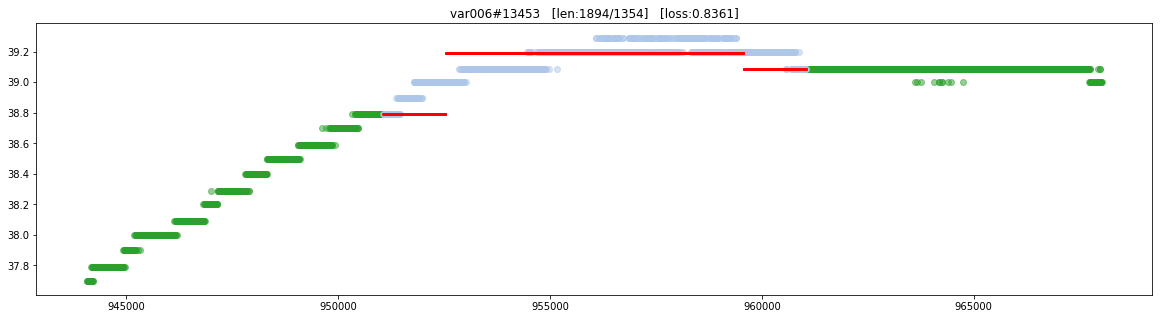

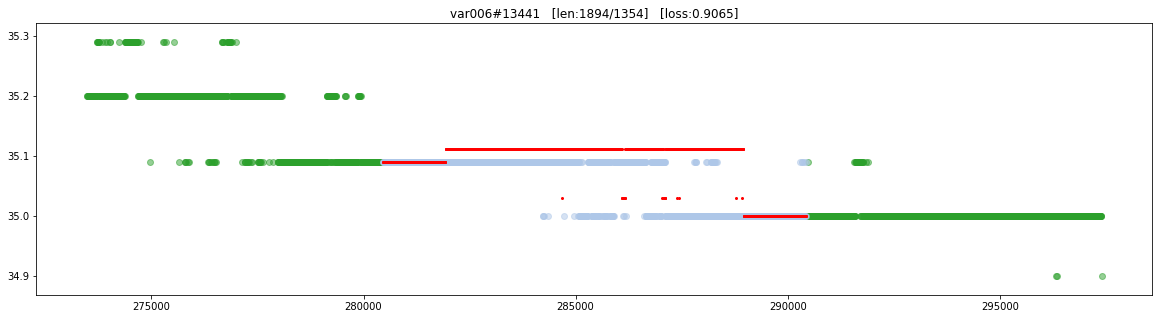

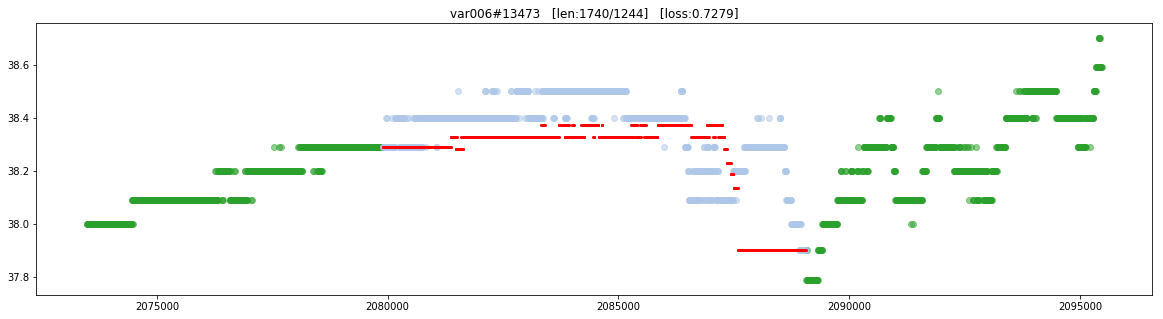

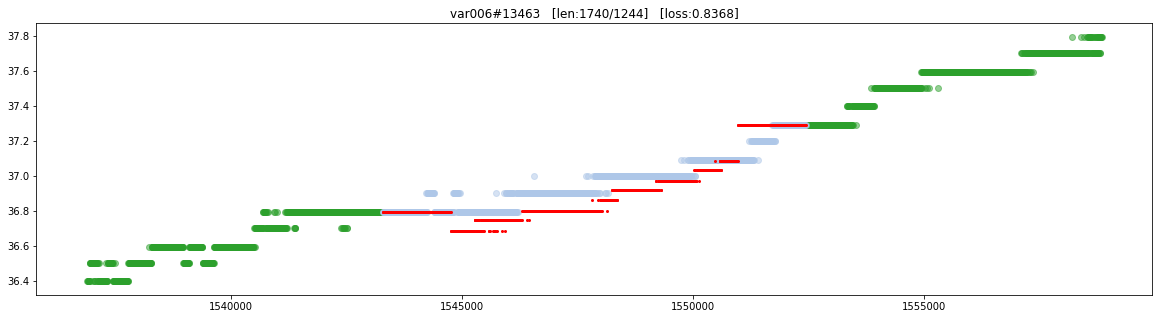

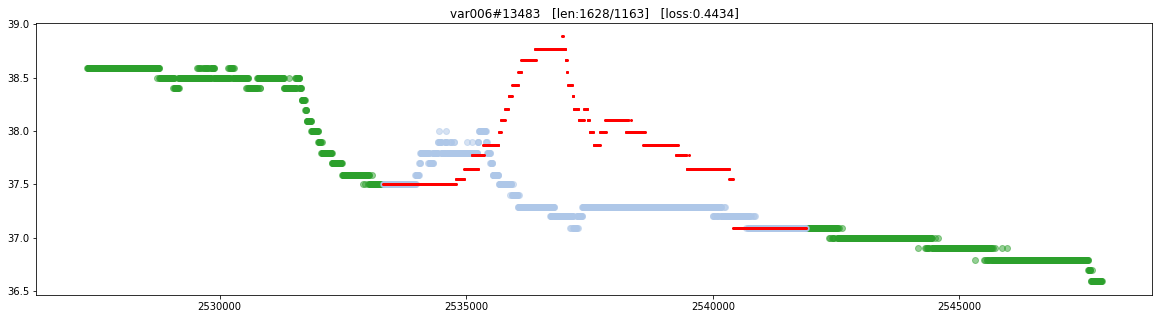

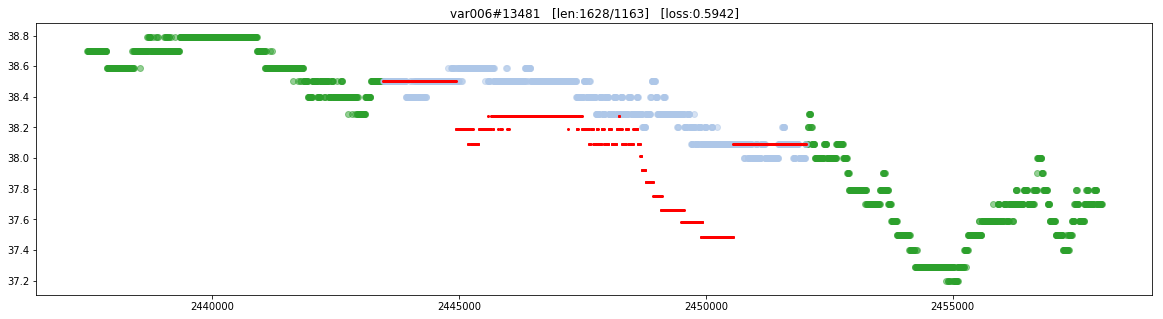

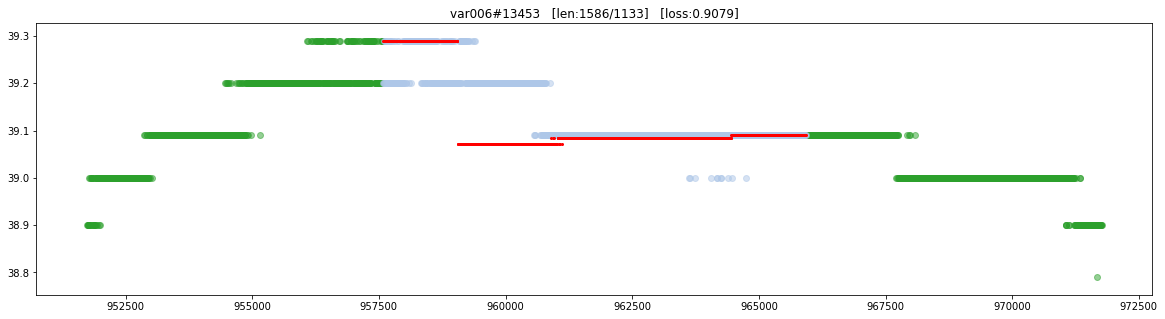

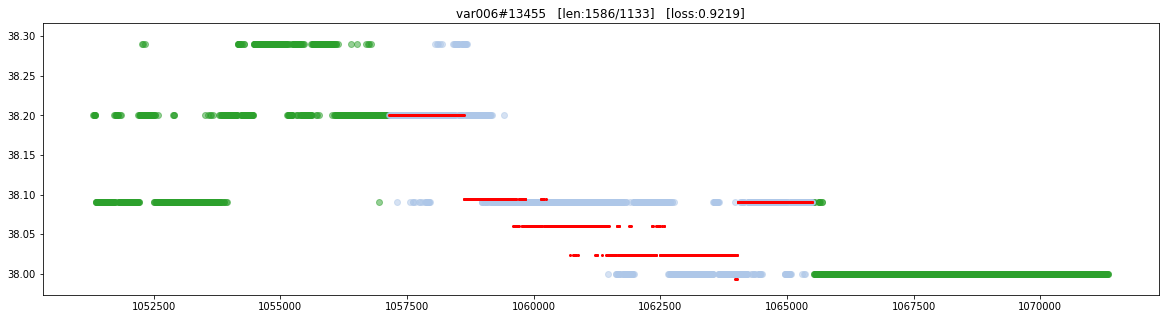

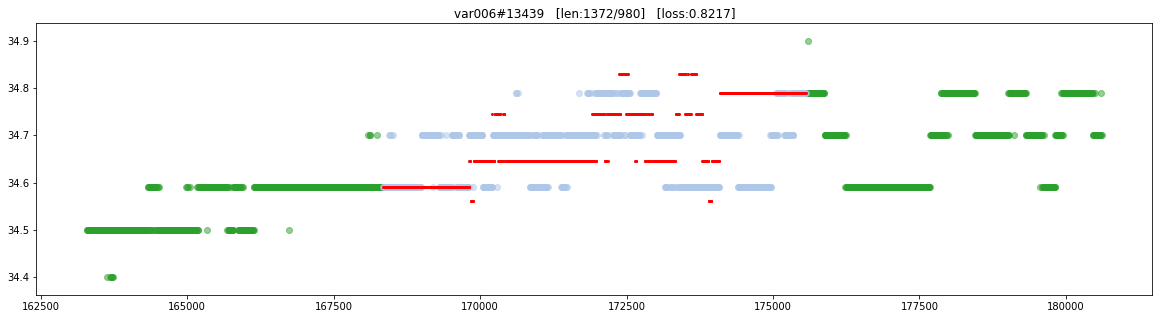

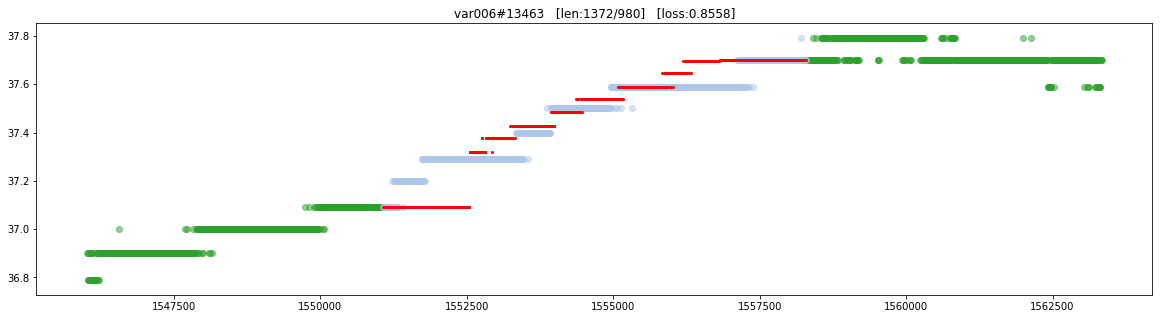

In [99]:

import sys
import os
import pandas as pd

from bokeh.palettes import Category10


from file_cache.utils.util_pandas import *
from file_cache.cache import file_cache

import matplotlib.pyplot as plt

#Adjust the working folder
file_folder = globals()['_dh'][0]
wk_dir = os.path.dirname(file_folder)
os.chdir(wk_dir)
from core.feature import *
from core.train import *

import matplotlib.pyplot as plt
logging.getLogger().setLevel(logging.WARNING)
logging.getLogger().setLevel(logging.INFO) 

    
    
#time_enable = False
#col_name =  'var031' #'var018'
#col =  'var018' #'var018'
#col =  'var067'
col_name = 'var006'
col = col_name
train_list = get_train_sample_list(5, col_name, args )
train_list = sorted(train_list, key=lambda val: len(val[1]), reverse=True)

args = get_best_para(col_name, None, top_n=0)
args.time_sn=0
args.file_num=2
logger.info(args)

count, loss = 0, 0
for train, val, blockid in train_list[:10]:
    plt.figure(figsize=(20,5))
    
    logger.info(val.columns)

    is_enum = True if 'int' in date_type[col].__name__ else False
    


        
    #print('shape',train_bk.shape, val_bk.shape, val_bk.columns, train_bk.index.min(),train_bk.index.max())
    fn = get_predict_fun(blockid,train.copy(), args)
    cur_count, cur_loss = score(val[col], fn(val.iloc[:, 1:]), is_enum)
    
    print(cur_loss, cur_count)                            
    loss  += cur_loss 
    count += cur_count 
    
    plt.title(f'{col}#{blockid}   [len:{len(train)}/{len(val)}]   [loss:{round(cur_loss/cur_count, 4)}]')
    
    #Original Point
    for color, data in zip(['#2ca02c','#aec7e8'], [train, val]):
        plt.scatter(data.time_sn, data[col], c= color, alpha=0.5)
        
    #Predict point    
    plt.scatter(val.time_sn, fn(val.iloc[:, 1:]), c='red', s=4)
    
    
    if args.file_num==1:
        x = np.linspace(train.time_sn.min(), train.time_sn.max(), 100)
        plt.plot(x, fn(np.expand_dims(x, axis=1))) 
    
    
    
    #print(val[col].shape, val.iloc[:, 1:].shape)
    
    
    


    logger.info(f'blockid:{blockid}, {train.index.min()},{train.index.max()}, time_sn:{train.time_sn.min()}:{train.time_sn.max()} {train.shape}, {val.shape}, score={round(cur_loss/cur_count,3)},')
print(f'Total loss====:{round(loss/count, 4)}, is_enum:{is_enum}, file_num:{args.file_num}, time_enable:{time_enable}, [{train.columns}]')




In [ ]:
plt.show()

In [ ]:
s = score(val[col], (fn(val_bk.iloc[:, 1:]) + val_bk.iloc[:, 1])/2, is_enum)
print(s[1]/s[0])

s = score(val[col], fn(val_bk.iloc[:, 1:])  , is_enum)
print(s[1]/s[0])

s = score(val[col],   val_bk.iloc[:, 1], is_enum)
print(s[1]/s[0])


In [ ]:
from sklearn.linear_model import Ridge
import numpy as np
n_samples, n_features = 10, 5
np.random.seed(0)
y = np.random.randn(n_samples)
X = np.random.randn(n_samples, 1)
print(X.shape)
print(y.shape)
clf = Ridge(alpha=1.0)
clf.fit(X, y) 

## Visual submit data

In [ ]:
import matplotlib.pyplot as plt

block = get_blocks() 
wtid = 1
col = 'var001'
missing_block = block.loc[(block.wtid == wtid) & (block.col == col) & (block.kind == 'missing')]
missing_block
for blockid, row in missing_block[:5].iterrows():
    train, sub = get_submit_feature_by_block_id(blockid)
    logger.info(f'blockid:{blockid}, train:{train.shape}')
    predict_fn = get_predict_fun(blockid, train)
    predict_res = predict_fn(sub.time_sn)
    sub[col] = predict_res
    
    for color, data in zip(Category10[5][:2], [train, sub]):
        plt.scatter(data.time_sn, data[col], c= color)
    
    x = np.linspace(train.time_sn.min(), train.time_sn.max(), 10000)
    
    is_enum = True if 'int' in date_type[col].__name__ else False
    cur_count, cur_loss = score(sub[col], predict_fn(sub.time_sn), is_enum)
    
    
    plt.plot(x, predict_fn(x))    
#     plt.plot(x, np.full_like(x, train[col].mean()) , c='r')  
    plt.show()

## Visual the specific train_feature accross file

Index(['var031', 'var031_2', 'var031_7', 'var031_15', 'var031_12', 'time_sn'], dtype='object')
573472.854 590594.499


/apps/dslab/anaconda/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


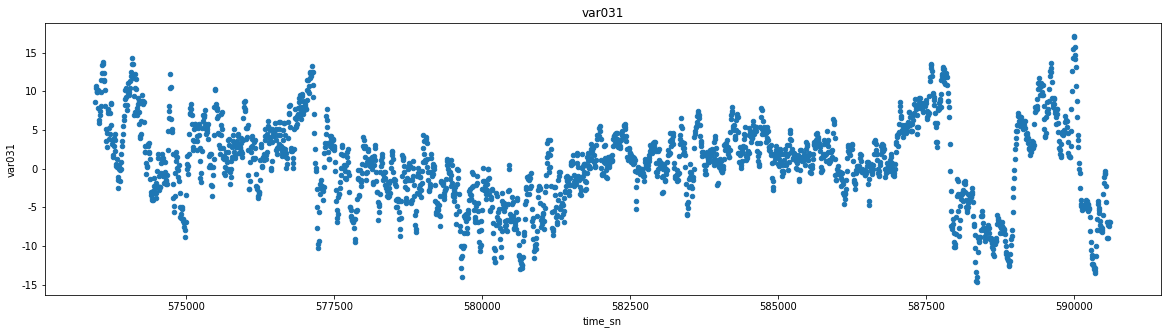

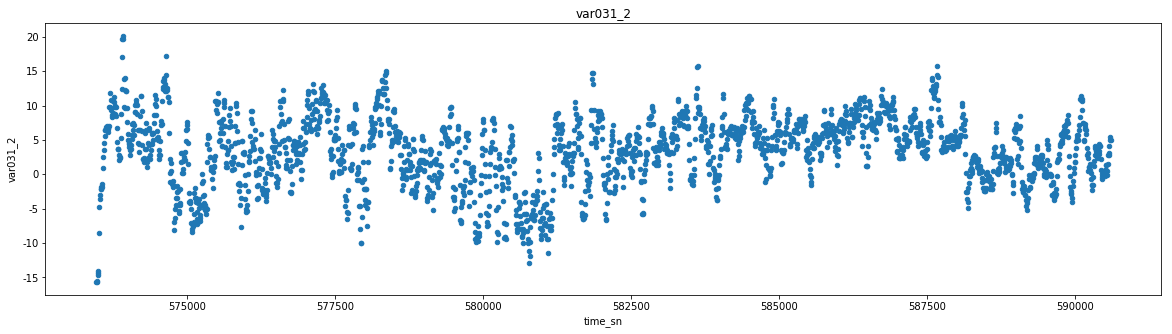

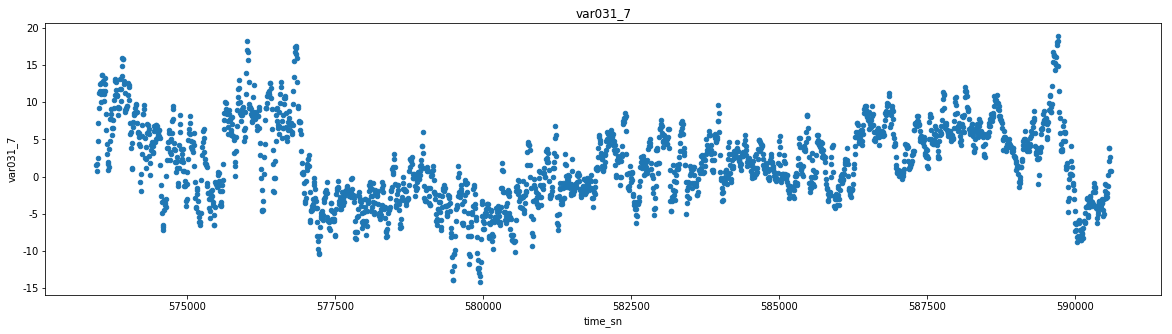

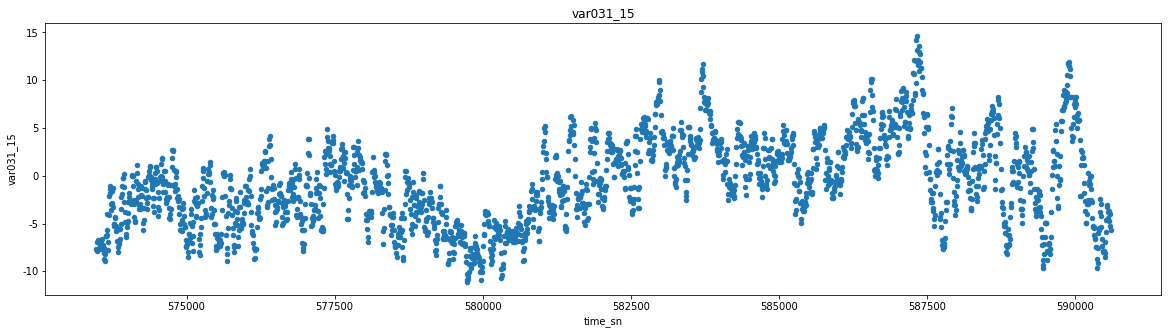

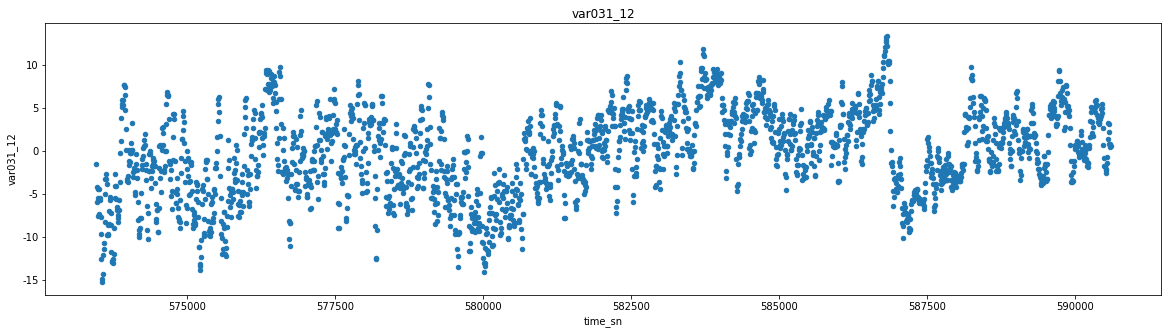

var031  var031_2  var031_7  var031_15  var031_12     time_sn
id                                                                 
77820    8.61    -15.73      1.54      -7.70      -1.45  573472.854
77821   10.40    -15.73      1.66      -7.84      -4.21  573480.217
77822   10.62    -15.50      0.74      -7.79      -5.92  573487.583
77823    9.92    -14.69      2.52      -6.92      -7.56  573494.951
77824   10.01    -14.28      4.80      -6.92      -5.46  573502.314

In [70]:
#col_name = 'var067'
tmp = get_train_feature_multi_file(5, col_name, args.file_num)
print(tmp.columns)


begin, end  = 77820, 80144
tmp_part = tmp.loc[begin:end, col_name]
#tmp_part.plot(figsize=(20,5))

print(tmp[begin:end].time_sn.min(), tmp[begin:end].time_sn.max())
for cur_col in [item for item in tmp.columns if  'var' in item]:
    tmp.loc[begin:end].plot.scatter(x='time_sn', y=cur_col,  figsize=(20,5), title=cur_col)


plot.show()

tmp.loc[begin:end].head()


In [ ]:
tmp = get_train_ex(5).loc[begin:end]
tmp.head()

In [ ]:
val = tmp.loc[begin:end]

s=score(val.var018.iloc[1:], val.var018.shift(1).iloc[1:])
s[1]/s[0]

 

In [ ]:
val.var018.shift(1)

In [ ]:
tmp = tmp.copy()
tmp['tmp'] = tmp.var031.shift(1)
#tmp['tmp'] = tmp.var031.rolling(2).mean().shift(1)
tmp = tmp[['var031', 'tmp']].dropna(how='any')

s=score(tmp.var031, tmp.tmp)
s[1]/s[0]


In [ ]:
get_blocks()

In [ ]:

print(cor.loc[f'{col_name}_1', f'{col_name}_2'])


step = 5000
begin = 4000 + step
end = 6000 +step



print(len(train_1.time_sn_1.loc[begin:end]) , len(train_2.time_sn_2.loc[begin:end]))

train_1[f'{col_name}_1'].loc[begin:end].plot()

train_2[f'{col_name}_2'].loc[begin:end].plot()

plt.show()

### 

In [ ]:
train_1.loc[begin:end]

In [ ]:
train_1.var034_1.iloc[begin:end].plot?

In [ ]:
train_1.var034_1.iloc[begin:end].plot

In [ ]:
tmp = std.groupby(['col', 'data_type'])['mean'].mean().sort_values().to_frame().reset_index()
print(tmp.columns)
tmp[tmp['data_type']=='int16']

In [ ]:
columns = list(date_type.keys())
columns.remove('wtid')
columns = sorted(columns)
for wtid in sorted(range(1, 34), reverse=True):
    for col in columns:
        check_std(wtid,col)

In [ ]:
logging.getLogger().setLevel(logging.DEBUG)


get_sub_template()

In [ ]:
get_blocks().iloc[45]

In [ ]:
get_blocks().iloc[6735]

In [ ]:

tmp = get_train_ex(3).loc[173119-4000:173119][['time_sn', 'var002']]
tmp.loc[(tmp.time_sn > 1250000) & (tmp.time_sn < 1290000)]

In [ ]:


feature_list = get_train_feature(1, 'var001')

len(feature_list)

In [ ]:
bk.groupby(['wtid','col']).length.sum()

In [ ]:
template = get_train_ex(1)
template.ts = pd.to_datetime(template.ts)
template['ts2'] = template.ts.shift(1)
template['gap'] = template.ts - template.ts2

template.gap = template['gap'].astype(int)//1000000000 
template['gap'].astype(int).hist()
plot.show()

In [ ]:
template['gap'].value_counts().sort_index()
#template['gap'].drop_duplicates().sort_values()

In [ ]:
 
        
col = 'var003'
get_result(1, col)


In [ ]:
train = get_train_ex(1)
train.iloc[354983-3: 354983+3]

In [ ]:

print(__doc__)

# Authors: Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>
#
# License: BSD 3 clause

import numpy as np

from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel


rng = np.random.RandomState(0)
X = rng.uniform(0, 5, 20)[:, np.newaxis]
y = 0.5 * np.sin(3 * X[:, 0]) + rng.normal(0, 0.5, X.shape[0])

# First run
plt.figure(0)
kernel = 1.0 * RBF(length_scale=100.0, length_scale_bounds=(1e-2, 1e3)) \
    + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e+1))
gp = GaussianProcessRegressor(kernel=kernel,
                              alpha=0.0).fit(X, y)
X_ = np.linspace(0, 5, 100)
y_mean, y_cov = gp.predict(X_[:, np.newaxis], return_cov=True)
plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
plt.fill_between(X_, y_mean - np.sqrt(np.diag(y_cov)),
                 y_mean + np.sqrt(np.diag(y_cov)),
                 alpha=0.5, color='k')
plt.plot(X_, 0.5*np.sin(3*X_), 'r', lw=3, zorder=9)
plt.scatter(X[:, 0], y, c='r', s=50, zorder=10, edgecolors=(0, 0, 0))
plt.title("Initial: %s\nOptimum: %s\nLog-Marginal-Likelihood: %s"
          % (kernel, gp.kernel_,
             gp.log_marginal_likelihood(gp.kernel_.theta)))
plt.tight_layout()

# Second run
plt.figure(1)
kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e3)) \
    + WhiteKernel(noise_level=1e-5, noise_level_bounds=(1e-10, 1e+1))
gp = GaussianProcessRegressor(kernel=kernel,
                              alpha=0.0).fit(X, y)
X_ = np.linspace(0, 5, 100)
y_mean, y_cov = gp.predict(X_[:, np.newaxis], return_cov=True)
plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
plt.fill_between(X_, y_mean - np.sqrt(np.diag(y_cov)),
                 y_mean + np.sqrt(np.diag(y_cov)),
                 alpha=0.5, color='k')
plt.plot(X_, 0.5*np.sin(3*X_), 'r', lw=3, zorder=9)
plt.scatter(X[:, 0], y, c='r', s=50, zorder=10, edgecolors=(0, 0, 0))
plt.title("Initial: %s\nOptimum: %s\nLog-Marginal-Likelihood: %s"
          % (kernel, gp.kernel_,
             gp.log_marginal_likelihood(gp.kernel_.theta)))
plt.tight_layout()

# Plot LML landscape
plt.figure(2)
theta0 = np.logspace(-2, 3, 49)
theta1 = np.logspace(-2, 0, 50)
Theta0, Theta1 = np.meshgrid(theta0, theta1)
LML = [[gp.log_marginal_likelihood(np.log([0.36, Theta0[i, j], Theta1[i, j]]))
        for i in range(Theta0.shape[0])] for j in range(Theta0.shape[1])]
LML = np.array(LML).T

vmin, vmax = (-LML).min(), (-LML).max()
vmax = 50
level = np.around(np.logspace(np.log10(vmin), np.log10(vmax), 50), decimals=1)
plt.contour(Theta0, Theta1, -LML,
            levels=level, norm=LogNorm(vmin=vmin, vmax=vmax))
plt.colorbar()
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Length-scale")
plt.ylabel("Noise-level")
plt.title("Log-marginal-likelihood")
plt.tight_layout()

plt.show()


In [ ]:
tmp['time_sn'] = (tmp.ts - pd.to_datetime('2018-07-01')).astype(int)/1000000000
 
# from datetime import timedelta
# tmp['gap'] = tmp['gap']/timedelta(hours=1)
# #tmp['gap'] = (  pd.to_datetime(tmp.ts2) - pd.to_datetime(tmp.ts) ) #/ np.timedelta64(1, 's')
# tmp.head()
#tmp.gap.astype(int)
tmp

In [ ]:
train = get_train_ex(1) 



missing = train[pd.isna(train['var001'])].index


In [ ]:
tmp.iloc[170590: 170599]

In [ ]:
tmp_1.var001.iloc[200:300].plot()
plot.show()

In [ ]:
tmp_1.var001.dropna().plot()
plot.show()

In [ ]:
len(tmp_1.var003), len(tmp_1.var003.dropna())

In [ ]:
from core.config import date_type
example = pd.read_csv('./input/submit_example.csv', dtype=date_type) 
example.head()


example.var016.drop_duplicates()


In [ ]:
pd.value_counts(example.var016)

In [ ]:
example.var001.iloc[0:3].astype(str)

In [ ]:
example.var001.iloc[0:3].apply(lambda val : True if val==405.37 else False)

In [ ]:
example.head()

In [ ]:
plt.show()

In [ ]:
from core import feature

In [ ]:

template = pd.read_csv('./input/template_submit_result.csv') 

print(template.shape)
#template 

In [ ]:

template = pd.read_csv('./input/template_submit_result.csv') 

train = pd.read_csv('./input/001/201807.csv') 
print(train.shape)

template = template.set_index(['ts', 'wtid'])
train = train.set_index(['ts', 'wtid'])


train = train[train.index.isin(template.index)]

train.shape

tmp = template.combine_first(train)
print(tmp.shape)


In [ ]:

 

tmp = get_sub_template()

tmp.head()

In [ ]:
tmp = get_sub_template()


In [ ]:
tmp.head(100)

In [ ]:
train_01 = pd.read_csv('./input/001/201807.csv') 
train_01.head()
#del train_01




In [ ]:
from core.feature import *
df = get_missing_analysis()

In [ ]:
df

In [ ]:
df.describe()

In [ ]:
df.var001[:1].describe()

In [ ]:
df.var001.astype(int).std()

In [ ]:
np.finfo(np.float16).max

In [ ]:

def get_analysis_enum():
    col_list = ['wtid','var053','var066','var016','var020','var047',  ]

    train_list = []
    for wtid in range(1, 34):
        wtid = str(wtid)
        train = pd.read_csv(f"./input/{wtid.rjust(3,'0')}/201807.csv", usecols=col_list)
        train = train.groupby(col_list).agg({'wtid':'count'})
        train.rename(index=str, columns={"wtid": "count"}, inplace=True)
        train = train.reset_index()
        print(train.shape)
        train_list.append(train)

    all = pd.concat(train_list)
    return all

enum_type = get_analysis_enum()

In [ ]:
tmp = enum_type[['var053','var066','var016','var020','var047',]].drop_duplicates(['var053','var066','var016','var020','var047',])

In [ ]:
enum_type.sort_values(['wtid', 'count', ], ascending=False)

In [ ]:
for i in sorted((range(1, 34)),reverse=True):
    print(i)

In [ ]:
import pprint
pprint.pprint(abc)

pprint.PrettyPrinter?

In [ ]:
abc = {'a':'b', 'c':'d'}


In [ ]:
tmp = get_blocks()

In [ ]:
time_all = pd.DataFrame()
time_list = []
for i in range(1, 4):
    train = get_train_ex(i)
    print(len(train))
    time_list.append(train.ts)
    
time_all = pd.concat(time_list, axis=1)

In [ ]:
time_all['min'] = time_all.iloc[:,:-3].min(axis=1)
time_all['max'] = time_all.iloc[:,:-3].max(axis=1)
time_all['gap'] = time_all['max'] - time_all['min']
time_all['gap'] =  time_all['gap'].astype(int).fillna(0)//1000000000
time_all.head()